# Compare regression models

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from specvae import utils

In [2]:
def load_experiment_from_path(filepath):
    return pd.read_csv(filepath, index_col=0)

def load_experiment(dataset, experiment_name, filename='experiment.csv', base_path=None):
    if base_path is None:
        filepath = utils.get_project_path() / '.model' / dataset / experiment_name / filename
    else:
        filepath = base_path / dataset / experiment_name / filename
    return load_experiment_from_path(filepath)

def load_experiment_sessions(dataset, experiment_name, filenames=['experiment.csv'], base_path=None):
    dfs = [load_experiment(dataset, experiment_name, filename, base_path) for filename in filenames]
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df

In [3]:
df1 = load_experiment_sessions('MoNA', 'reg_nextron', ['experiment01_pfi.csv', 'experiment02_pfi.csv'])
df2 = load_experiment_sessions('HMDB', 'reg_nextron', ['experiment01_pfi.csv'])

df = pd.concat([df1, df2], ignore_index=True)
df

,name,target_column,target_column_id,dataset,full_model_name,layer_config,input_columns,param_dropout,param_max_mz,param_min_intensity,...,m_valid_MAE,m_valid_R2,m_valid_explained_variance,m_test_loss,m_test_MSE,m_test_RMSE,m_test_MAE,m_test_R2,m_test_explained_variance,feature_importance
0,reg,collision_energy,collision_energy,MoNA,regressor_742-494-185-1_01 (04-12-2021_00-24-14),"[742, 494, 185]","['spectrum', 'total_exact_mass', 'precursor_mz...",0.0,2500.0,0.001,...,9.809871,0.621832,0.637542,337.672113,337.672058,18.264490,13.082102,0.481950,0.486326,"{'kingdom_id': 0.0, 'ionization_mode_id': 1.32..."
1,reg,collision_energy,collision_energy,MoNA,regressor_742-494-185-1_01 (04-12-2021_00-38-05),"[742, 494, 185]","['spectrum', 'total_exact_mass', 'precursor_mz...",0.0,2500.0,0.001,...,9.034459,0.692806,0.698665,283.806479,283.806458,16.740383,12.019321,0.549698,0.568448,"{'kingdom_id': 0.0, 'ionization_mode_id': 0.44..."
2,reg,collision_energy,collision_energy,MoNA,regressor_742-494-185-1_01 (04-12-2021_00-51-48),"[742, 494, 185]","['spectrum', 'total_exact_mass', 'precursor_mz...",0.0,2500.0,0.010,...,10.800580,0.548628,0.597827,415.762490,415.762512,20.309729,14.784053,0.332352,0.454803,"{'kingdom_id': 0.0, 'ionization_mode_id': 0.37..."
3,reg,collision_energy,collision_energy,MoNA,regressor_742-494-185-1_01 (04-12-2021_01-04-47),"[742, 494, 185]","['spectrum', 'total_exact_mass', 'precursor_mz...",0.0,2500.0,0.010,...,10.227586,0.562607,0.639823,360.027885,360.027893,18.887917,13.065880,0.453370,0.556482,"{'kingdom_id': 0.0, 'class_id': 1.466885375976..."
4,reg,collision_energy,collision_energy,MoNA,regressor_742-494-185-1_01 (04-12-2021_01-19-31),"[742, 494, 185]","['spectrum', 'total_exact_mass', 'precursor_mz...",0.0,2500.0,0.100,...,9.346944,0.648519,0.655191,300.763797,300.763672,17.266882,12.140399,0.529657,0.539868,"{'ionization_mode_id': -1.665960693359375, 'ki..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,reg,collision_energy,collision_energy,HMDB,regressor_379-252-94-1_01 (03-12-2021_23-45-43),"[379, 252, 94]","['spectrum', 'ionization_mode_id', 'kingdom_id...",0.0,2500.0,0.200,...,3.814875,0.754325,0.769834,31.436900,31.436899,5.572229,3.533952,0.796001,0.800618,"{'kingdom_id': 0.06855201721191406, 'superclas..."
223,reg,collision_energy,collision_energy,HMDB,regressor_379-252-94-1_01 (03-12-2021_23-52-12),"[379, 252, 94]","['spectrum', 'ionization_mode_id', 'kingdom_id...",0.0,2500.0,0.500,...,3.957608,0.746289,0.763773,33.732034,33.732029,5.790443,3.693949,0.779043,0.781656,"{'kingdom_id': 0.10570640563964843, 'superclas..."
224,reg,collision_energy,collision_energy,HMDB,regressor_379-252-94-1_01 (03-12-2021_23-58-45),"[379, 252, 94]","['spectrum', 'ionization_mode_id', 'kingdom_id...",0.0,2500.0,0.500,...,4.115575,0.744099,0.772773,33.313691,33.313690,5.734858,3.778708,0.784603,0.794265,"{'kingdom_id': -0.04538459777832031, 'supercla..."
225,reg,collision_energy,collision_energy,HMDB,regressor_379-252-94-1_01 (04-12-2021_00-05-23),"[379, 252, 94]","['spectrum', 'ionization_mode_id', 'kingdom_id...",0.0,2500.0,1.000,...,3.913004,0.735560,0.746635,33.104613,33.104618,5.722267,3.575754,0.785339,0.789204,"{'kingdom_id': -0.10709953308105469, 'supercla..."


In [4]:
columns = list(df.columns)
params = list(filter(lambda x: x.startswith('param_'), columns))
values = list(filter(lambda x: x.startswith('m_'), columns))
others = list(filter(lambda x: not x.startswith('m_') and not x.startswith('param_'), columns))
# Separate by split:
train_values = list(filter(lambda x: x.startswith('m_train_'), columns))
valid_values = list(filter(lambda x: x.startswith('m_valid_'), columns))
test_values = list(filter(lambda x: x.startswith('m_test_'), columns))

## Scores vs. number of peaks

In [5]:
reg_scores = ['m_train_MSE', 'm_train_RMSE', 'm_train_MAE', 'm_train_R2', 'm_train_explained_variance']

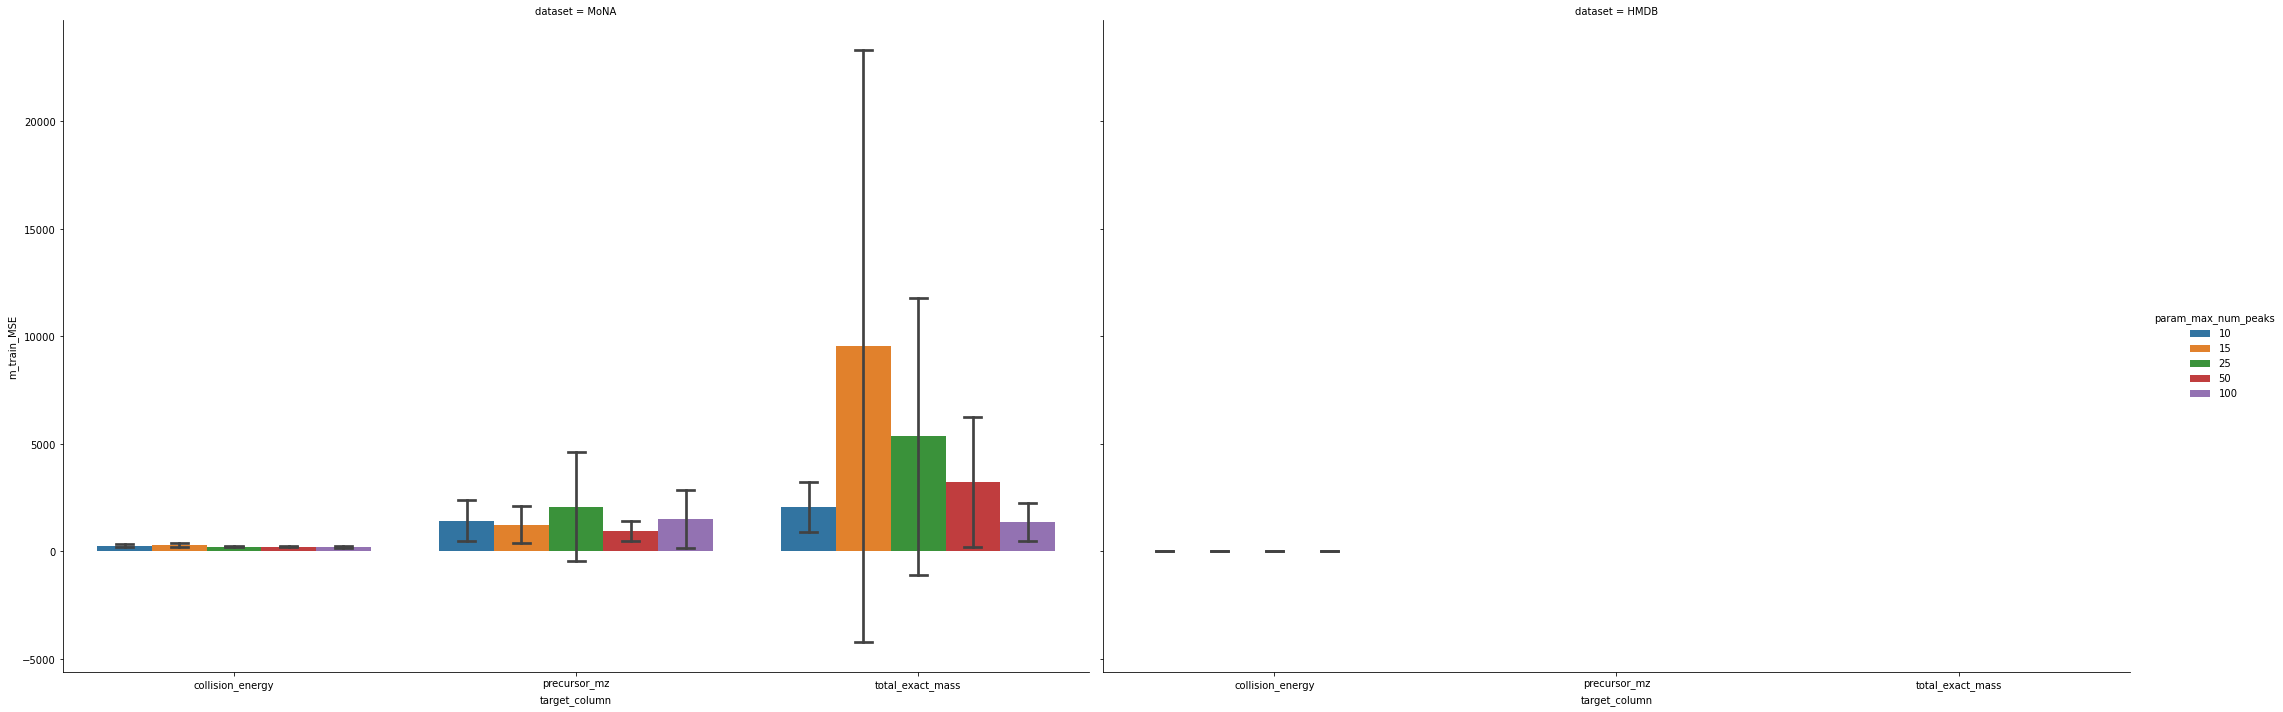

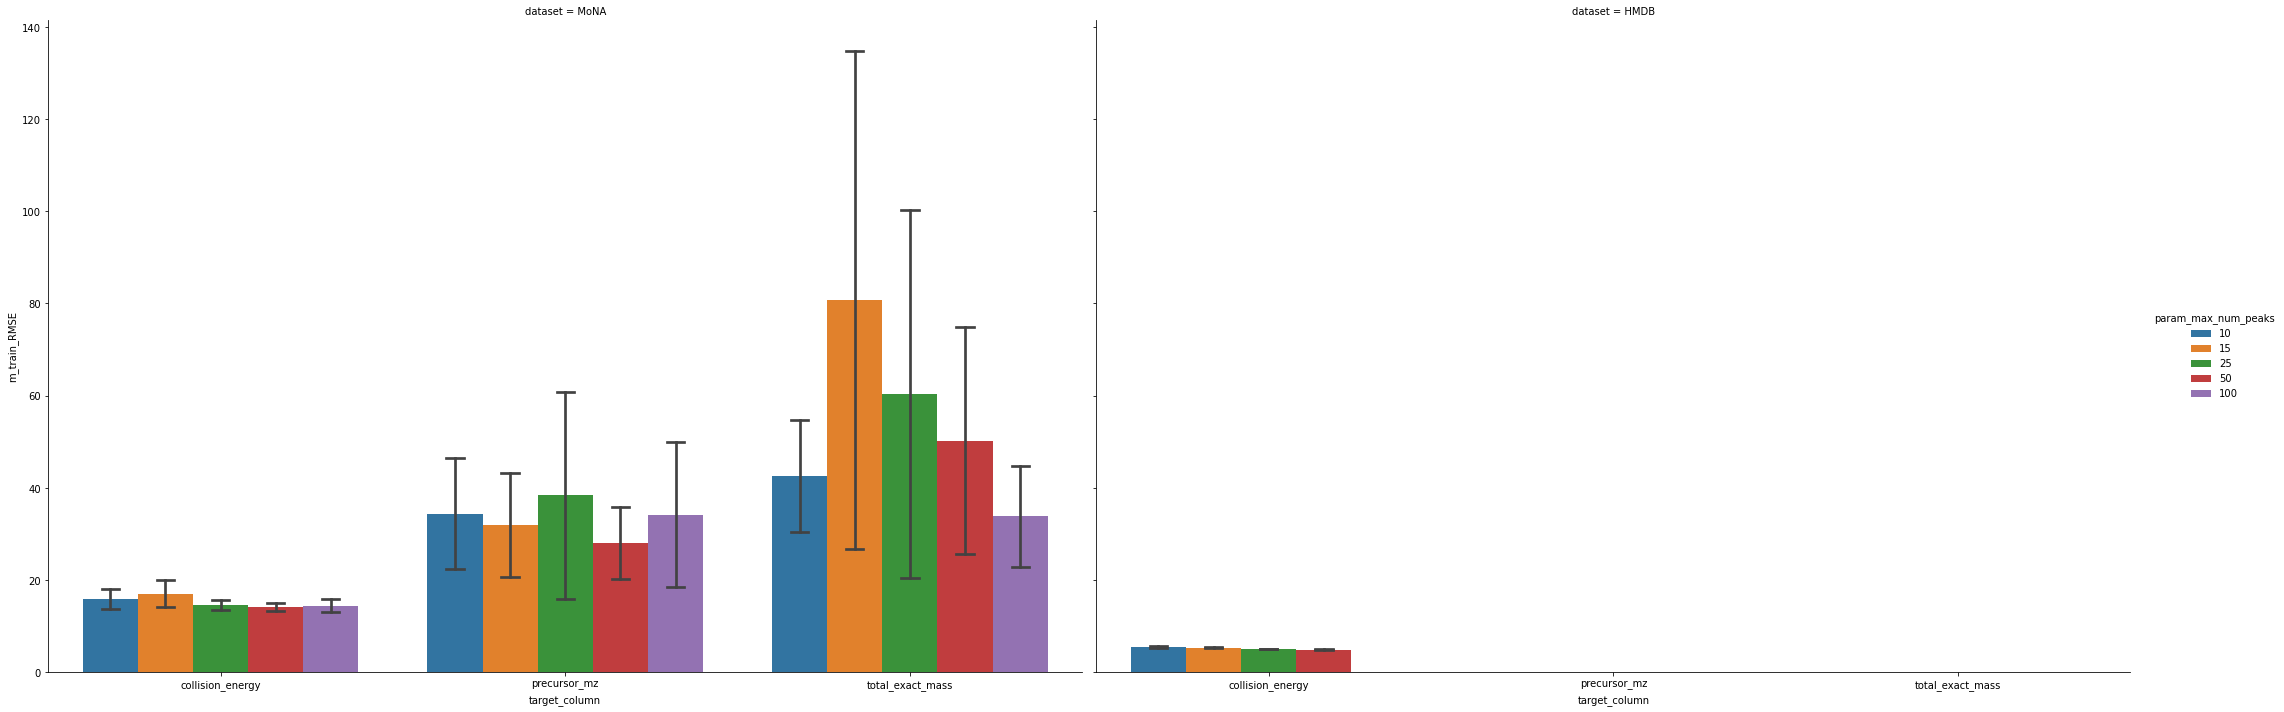

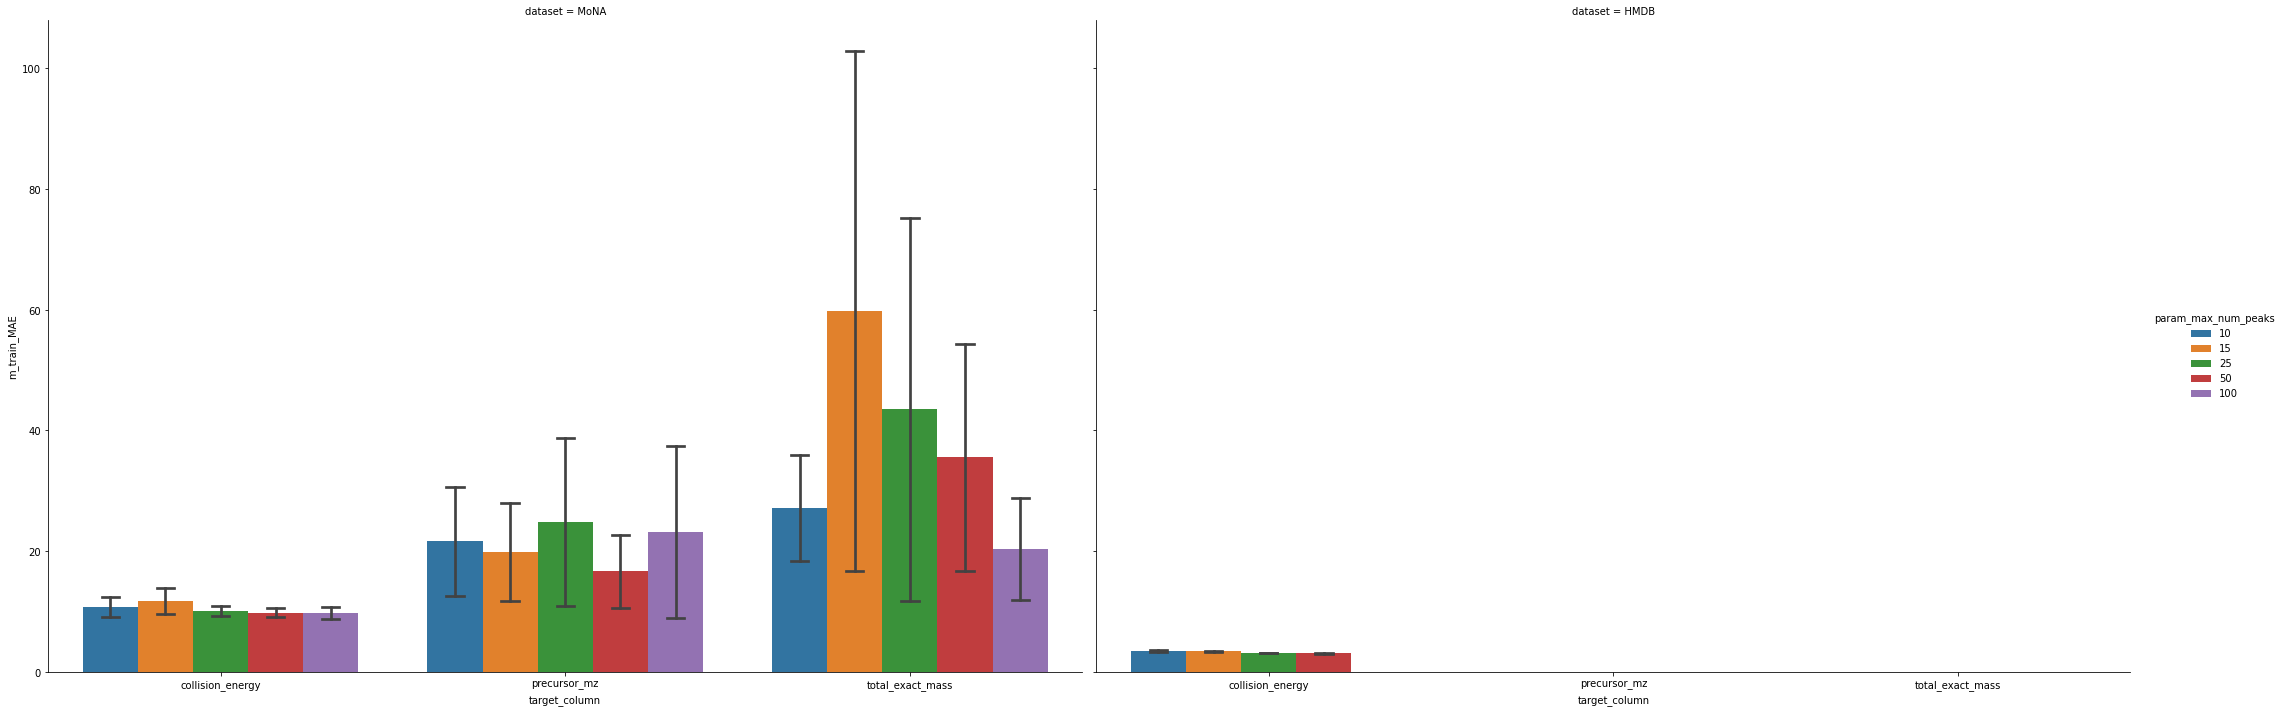

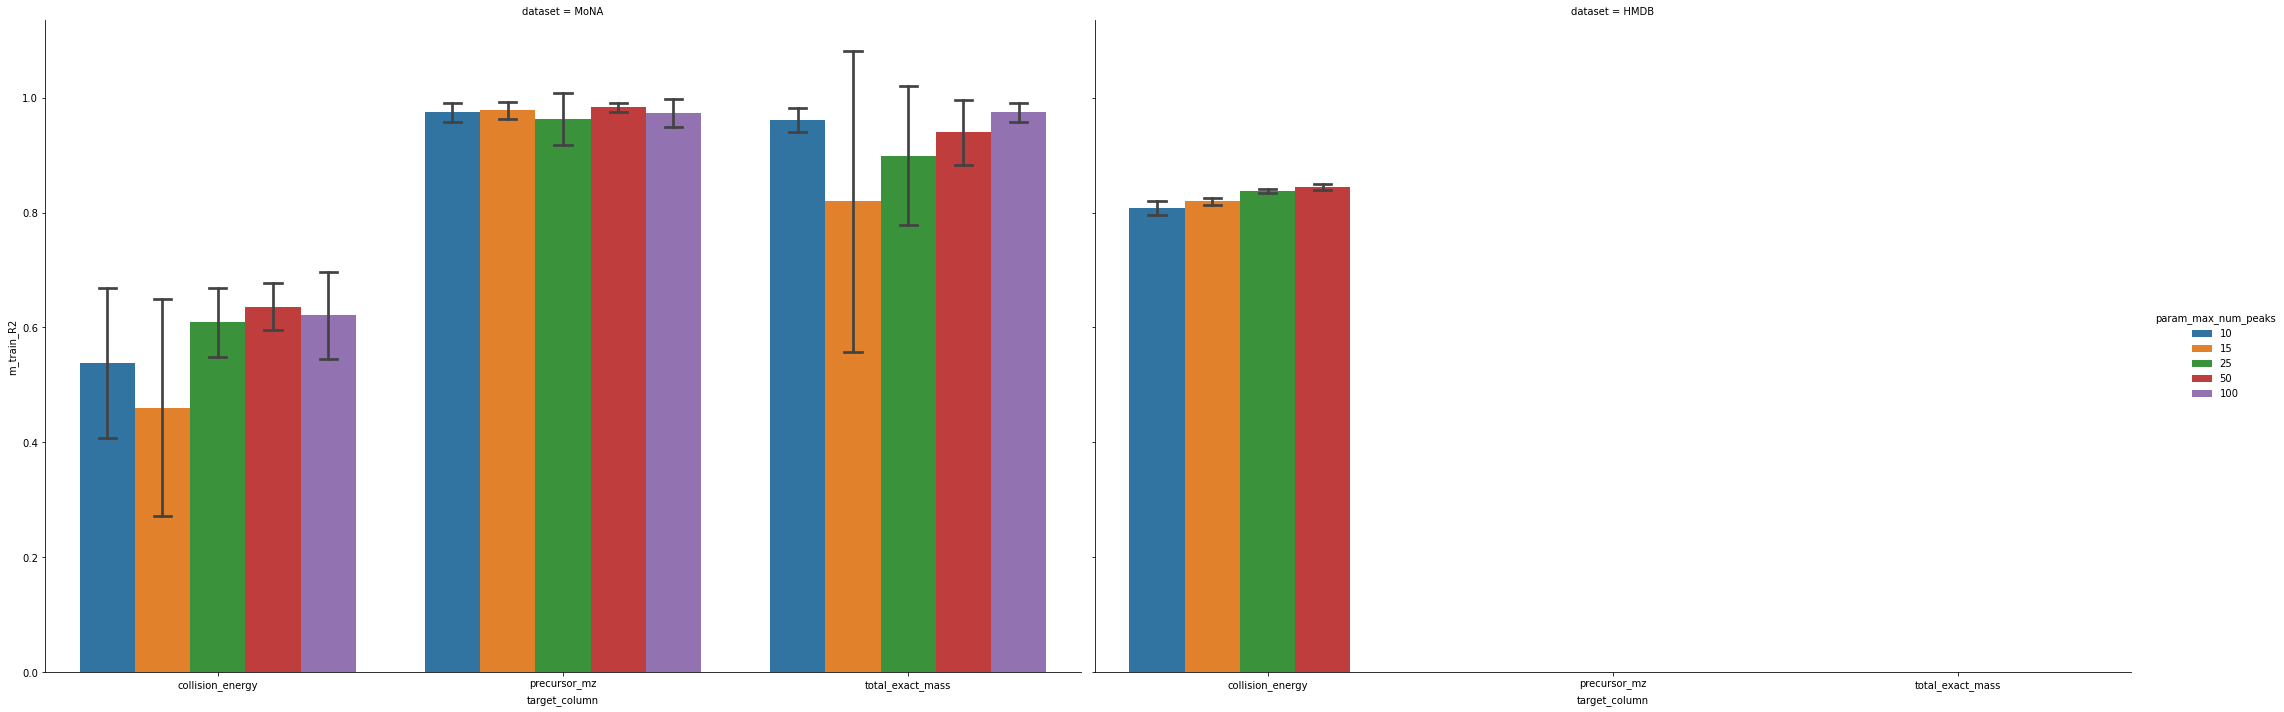

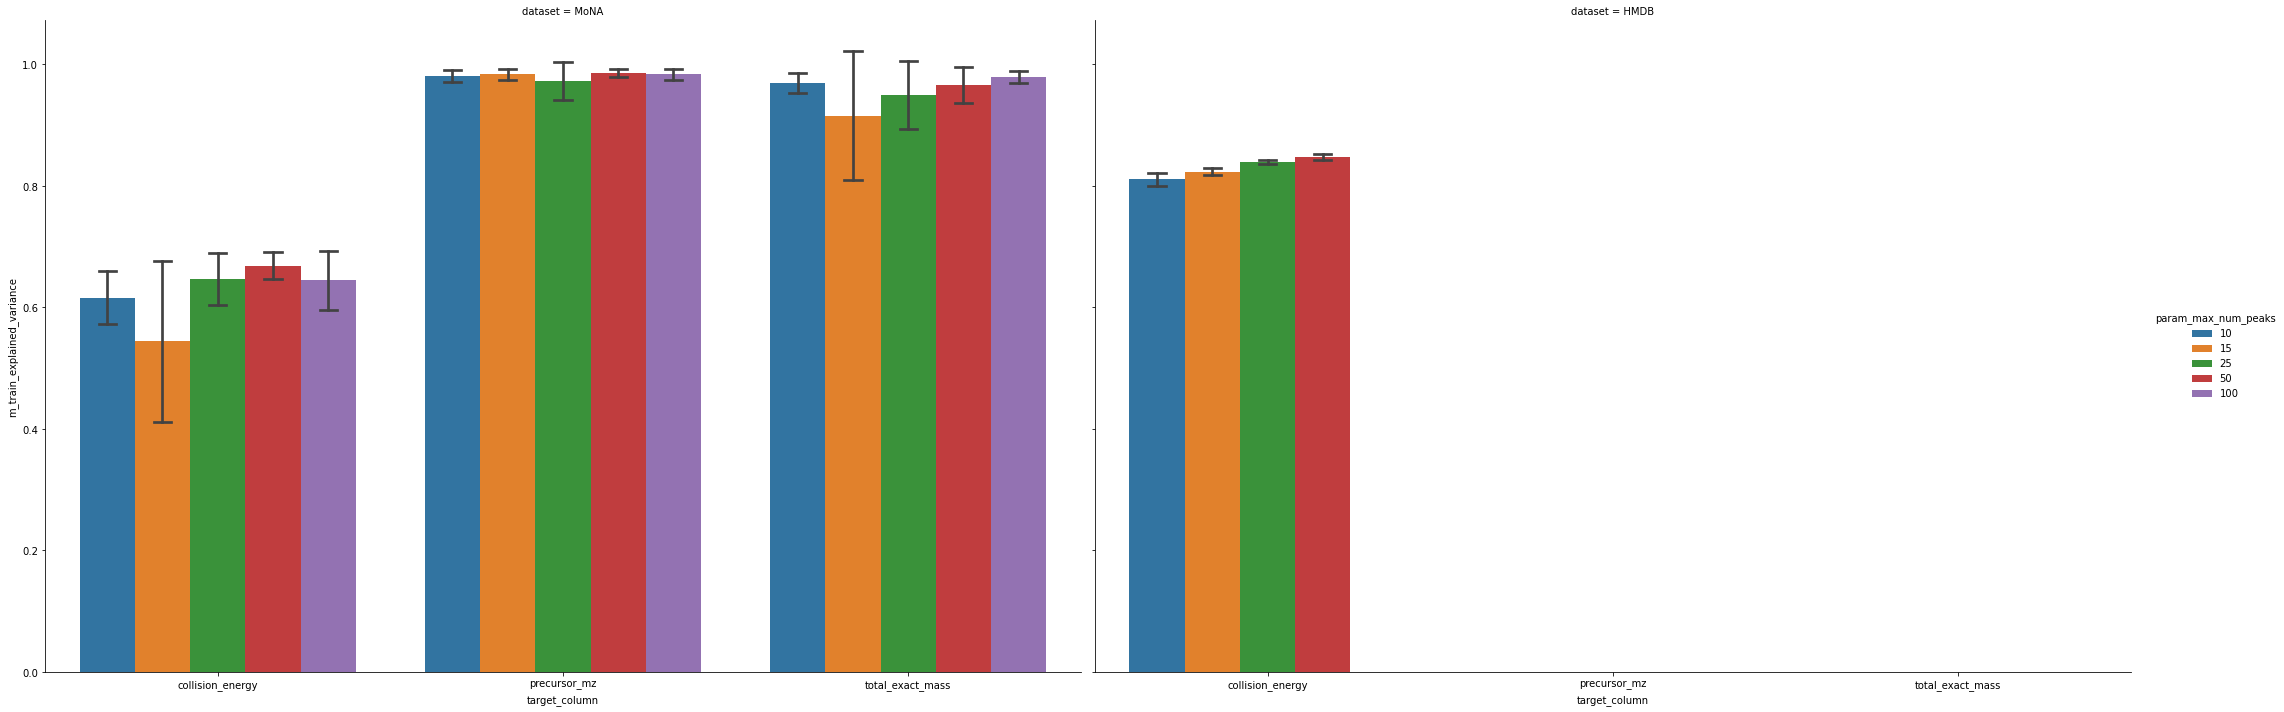

In [6]:
for column in reg_scores:
    ax = sns.catplot(data=df, x="target_column", y=column, col='dataset',
        hue="param_max_num_peaks", kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5)

## Scores vs. minimum intensity

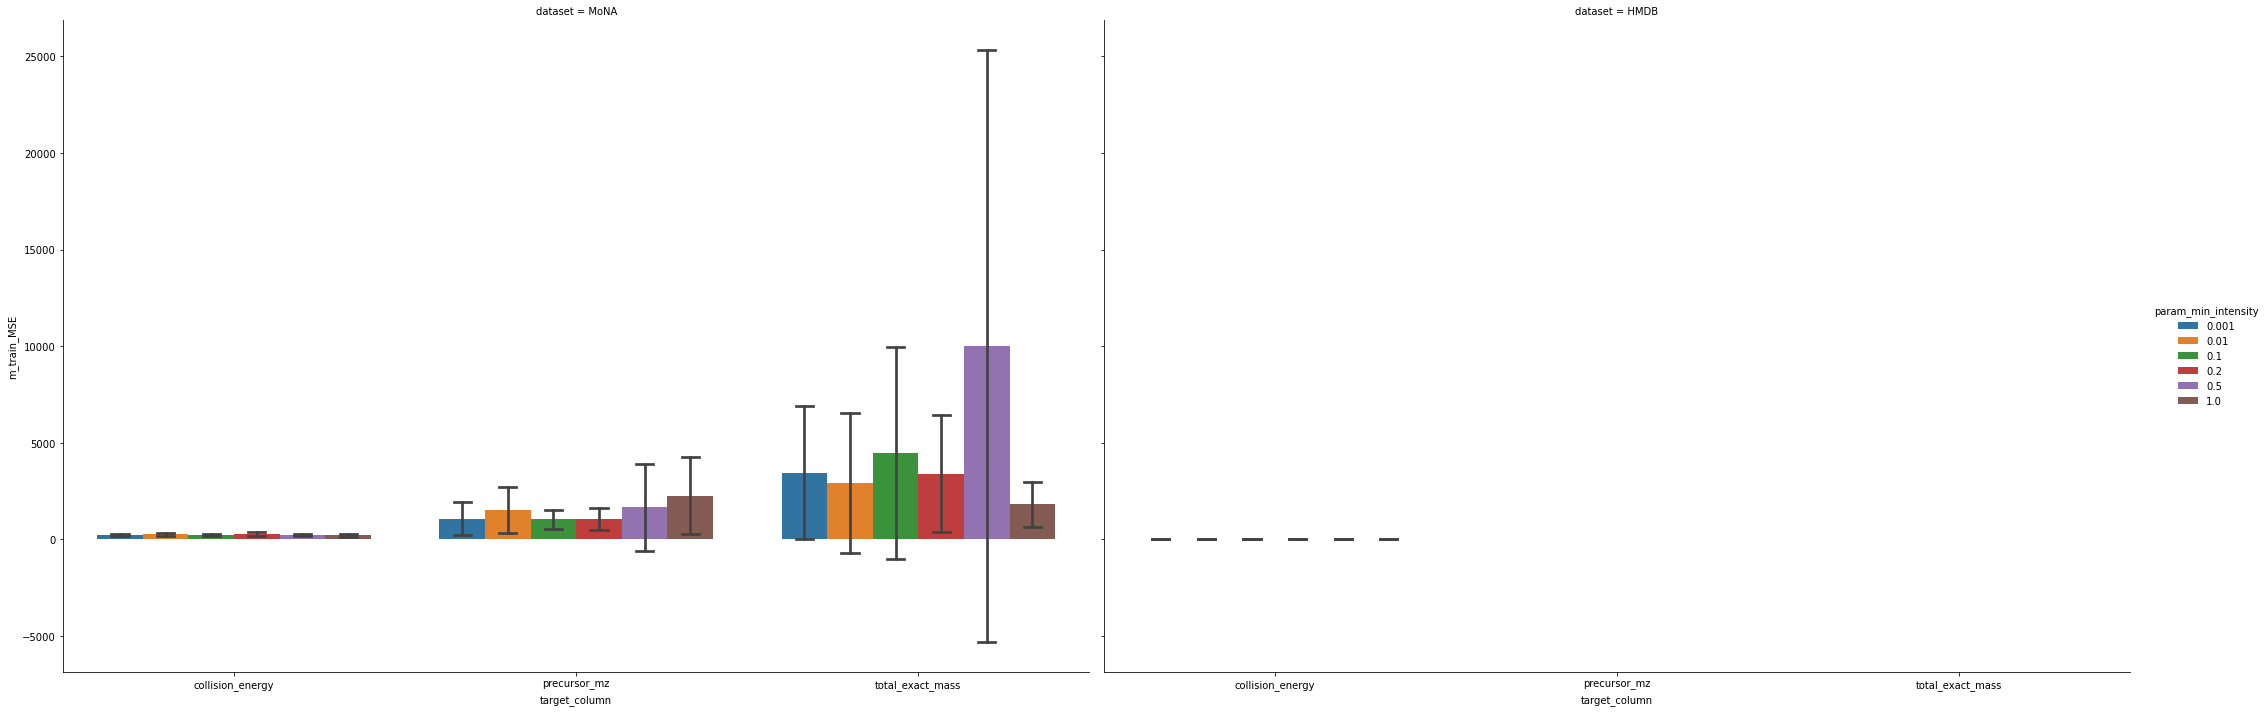

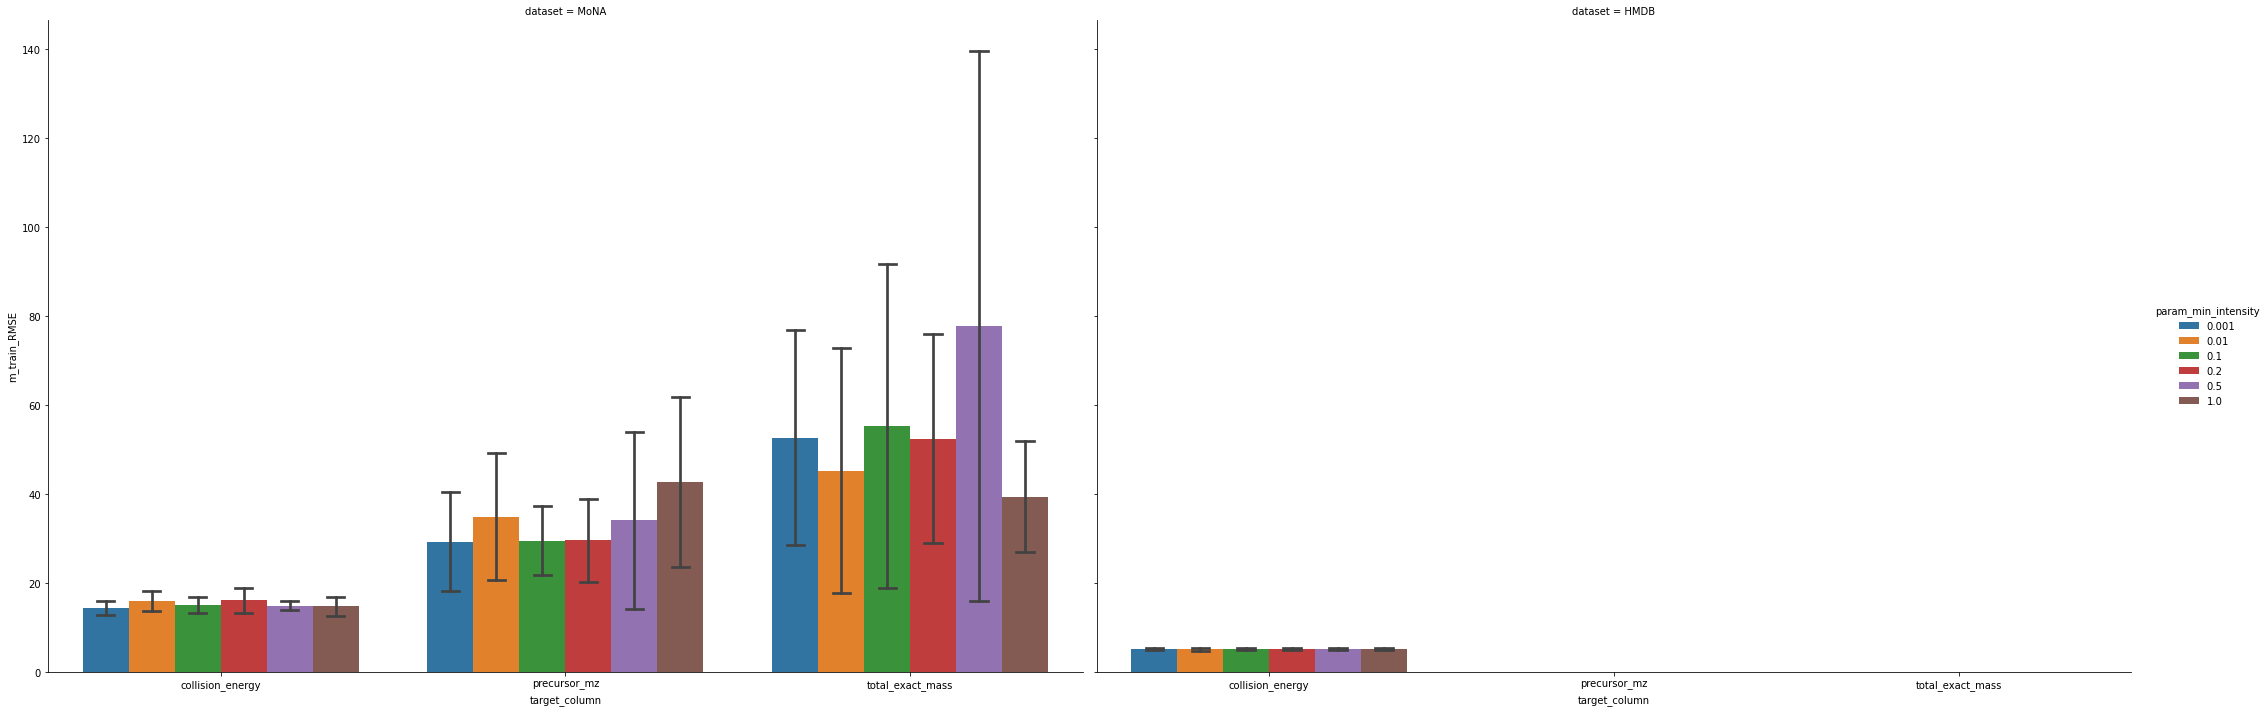

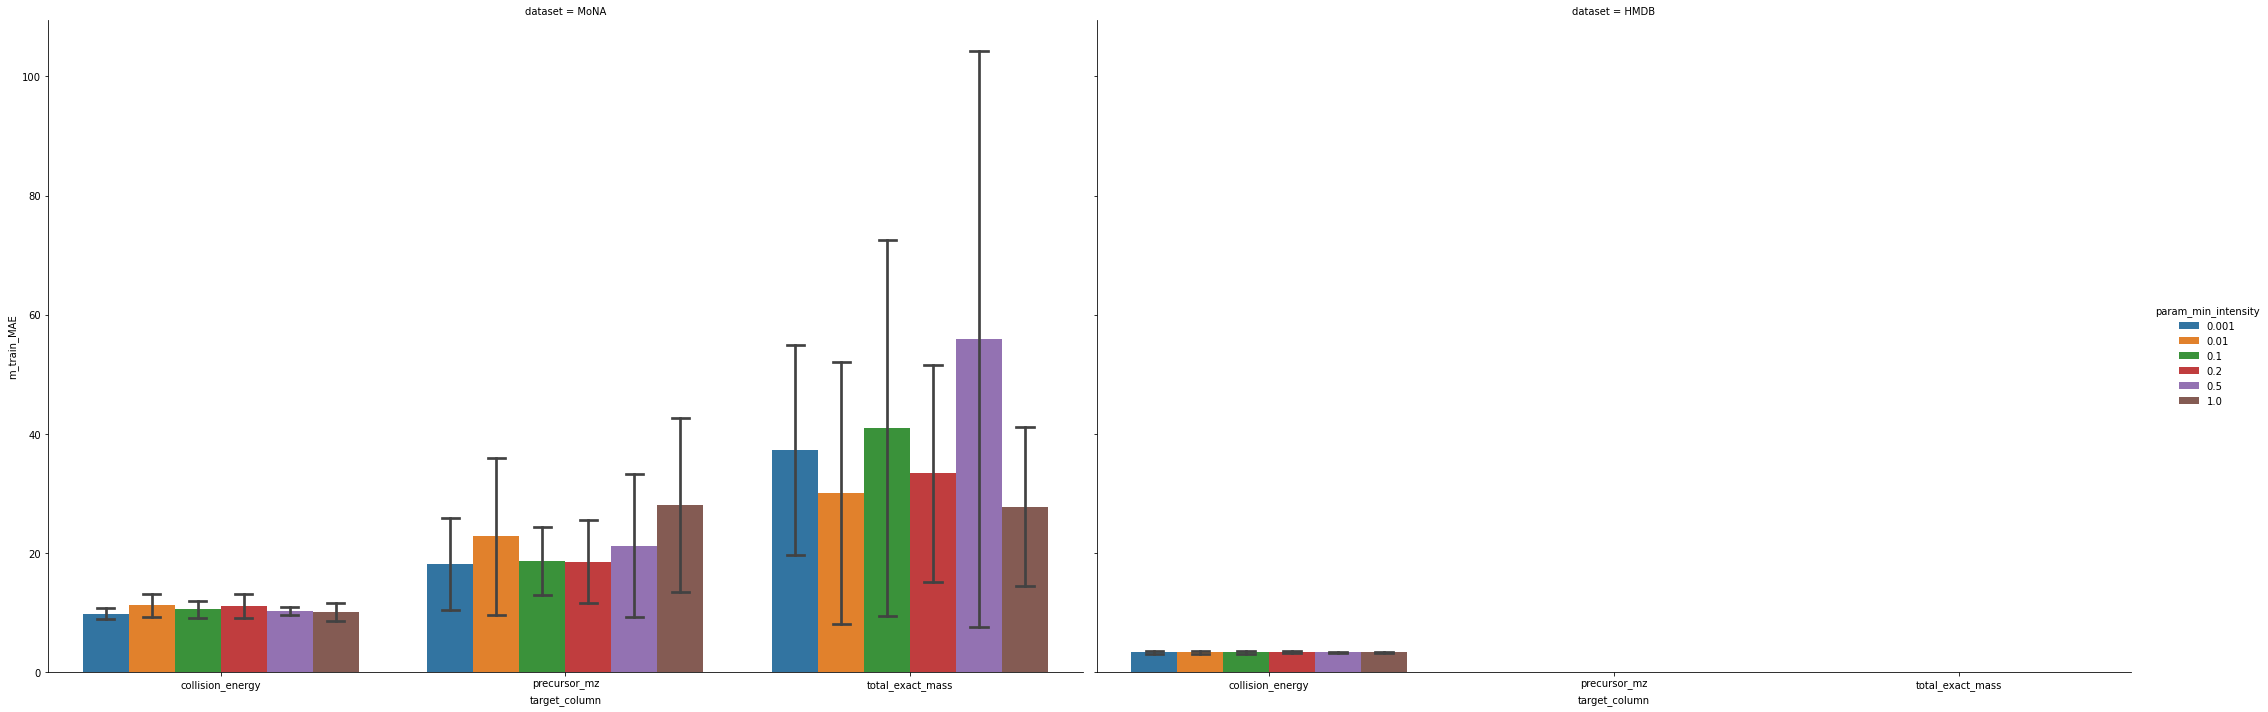

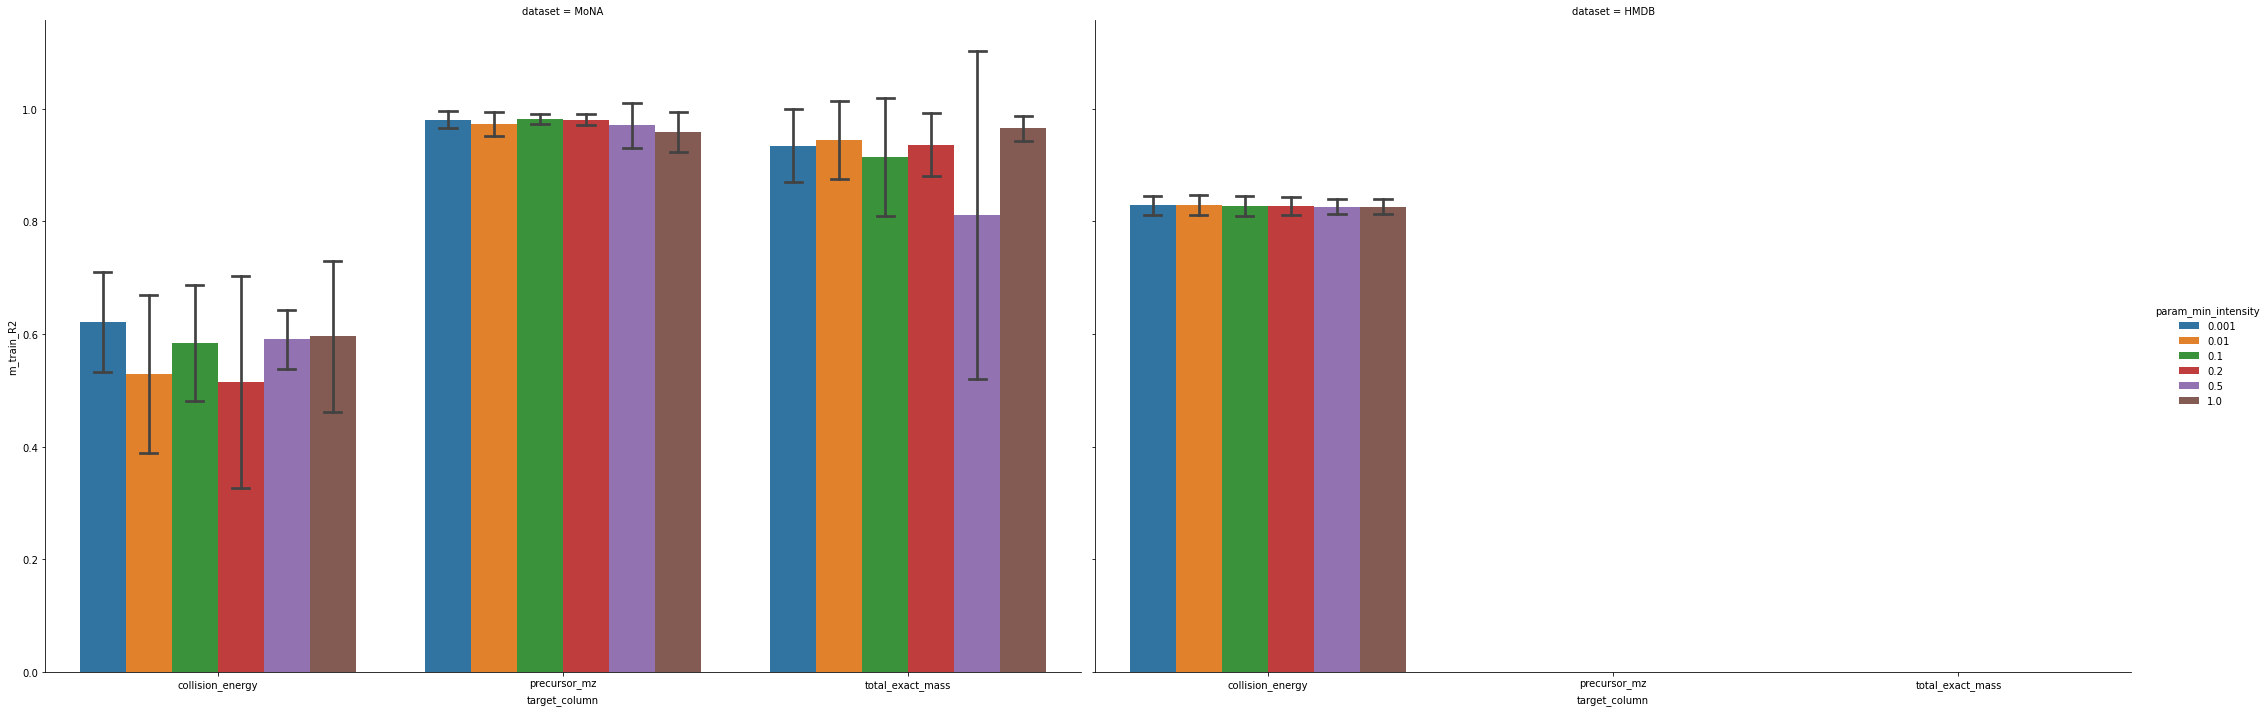

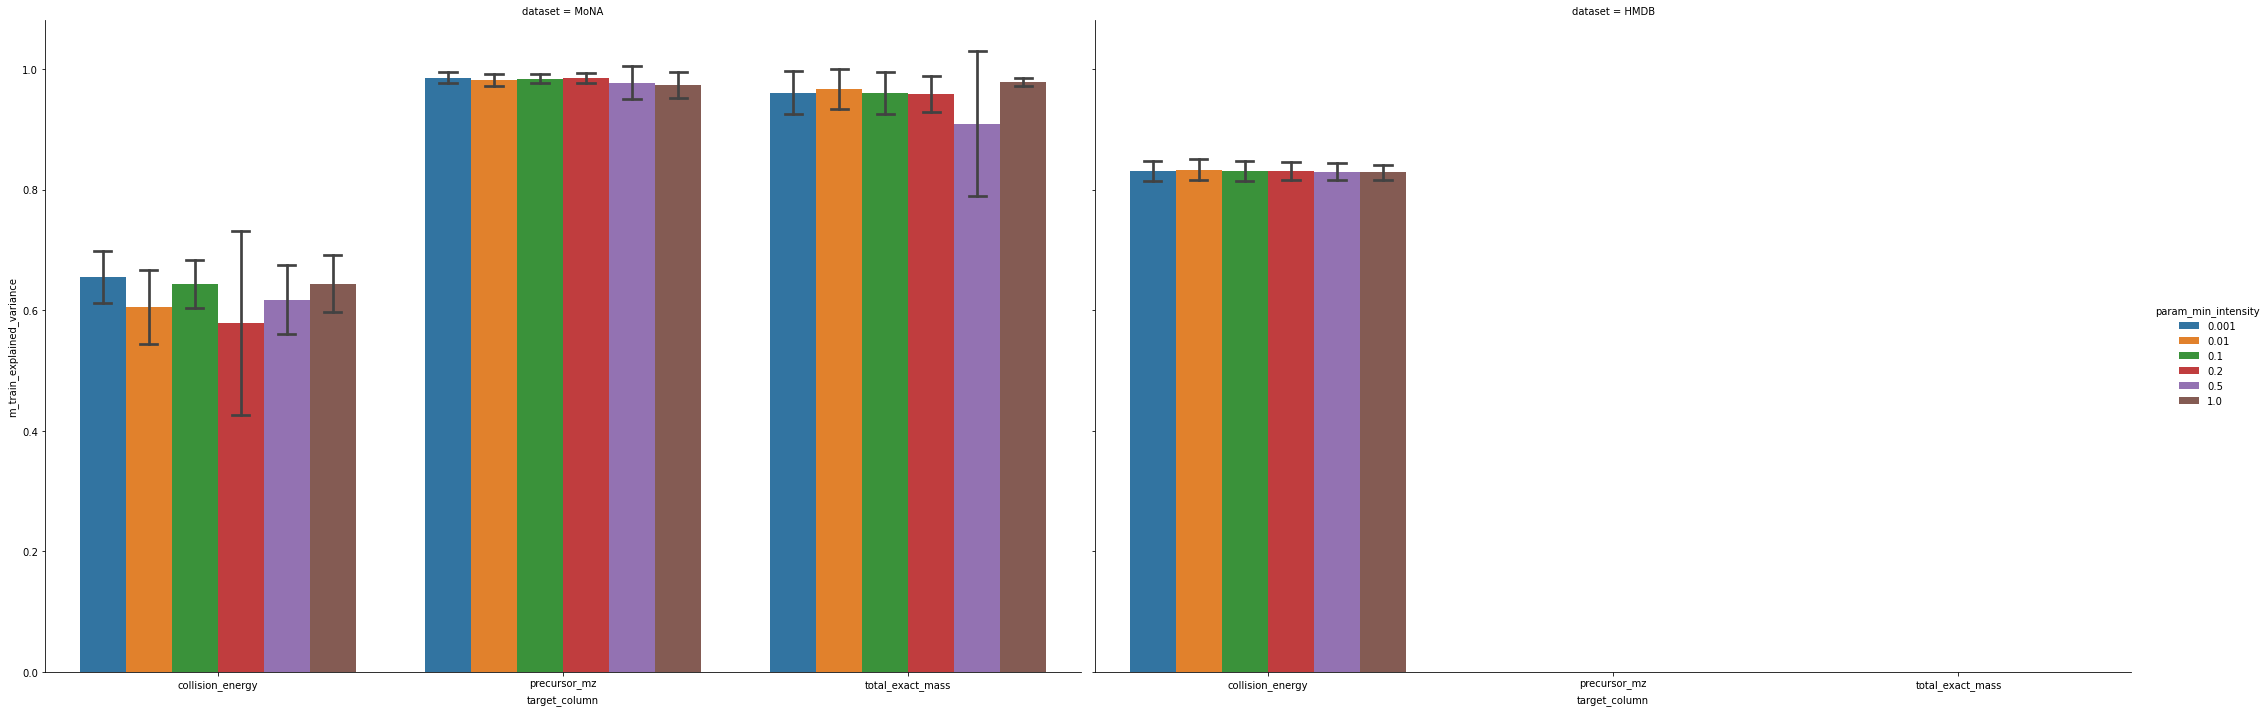

In [7]:
for column in reg_scores:
    ax = sns.catplot(data=df, x="target_column", y=column, col='dataset',
        hue="param_min_intensity", kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5)

## Scores vs. rescale intensity

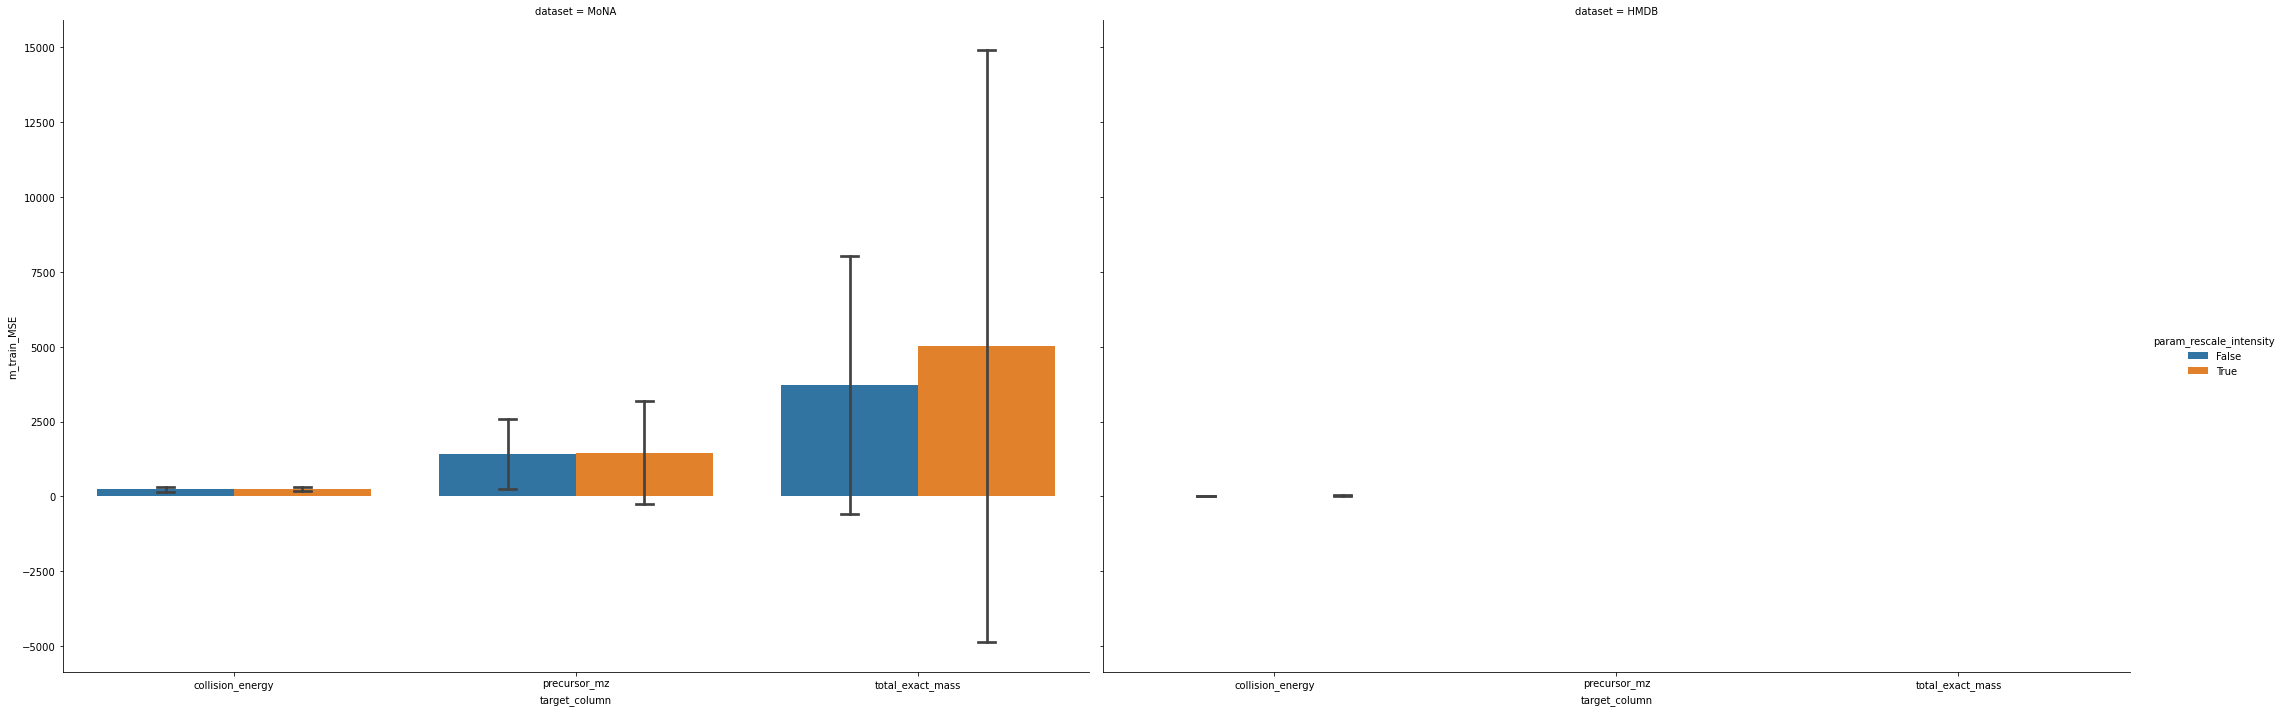

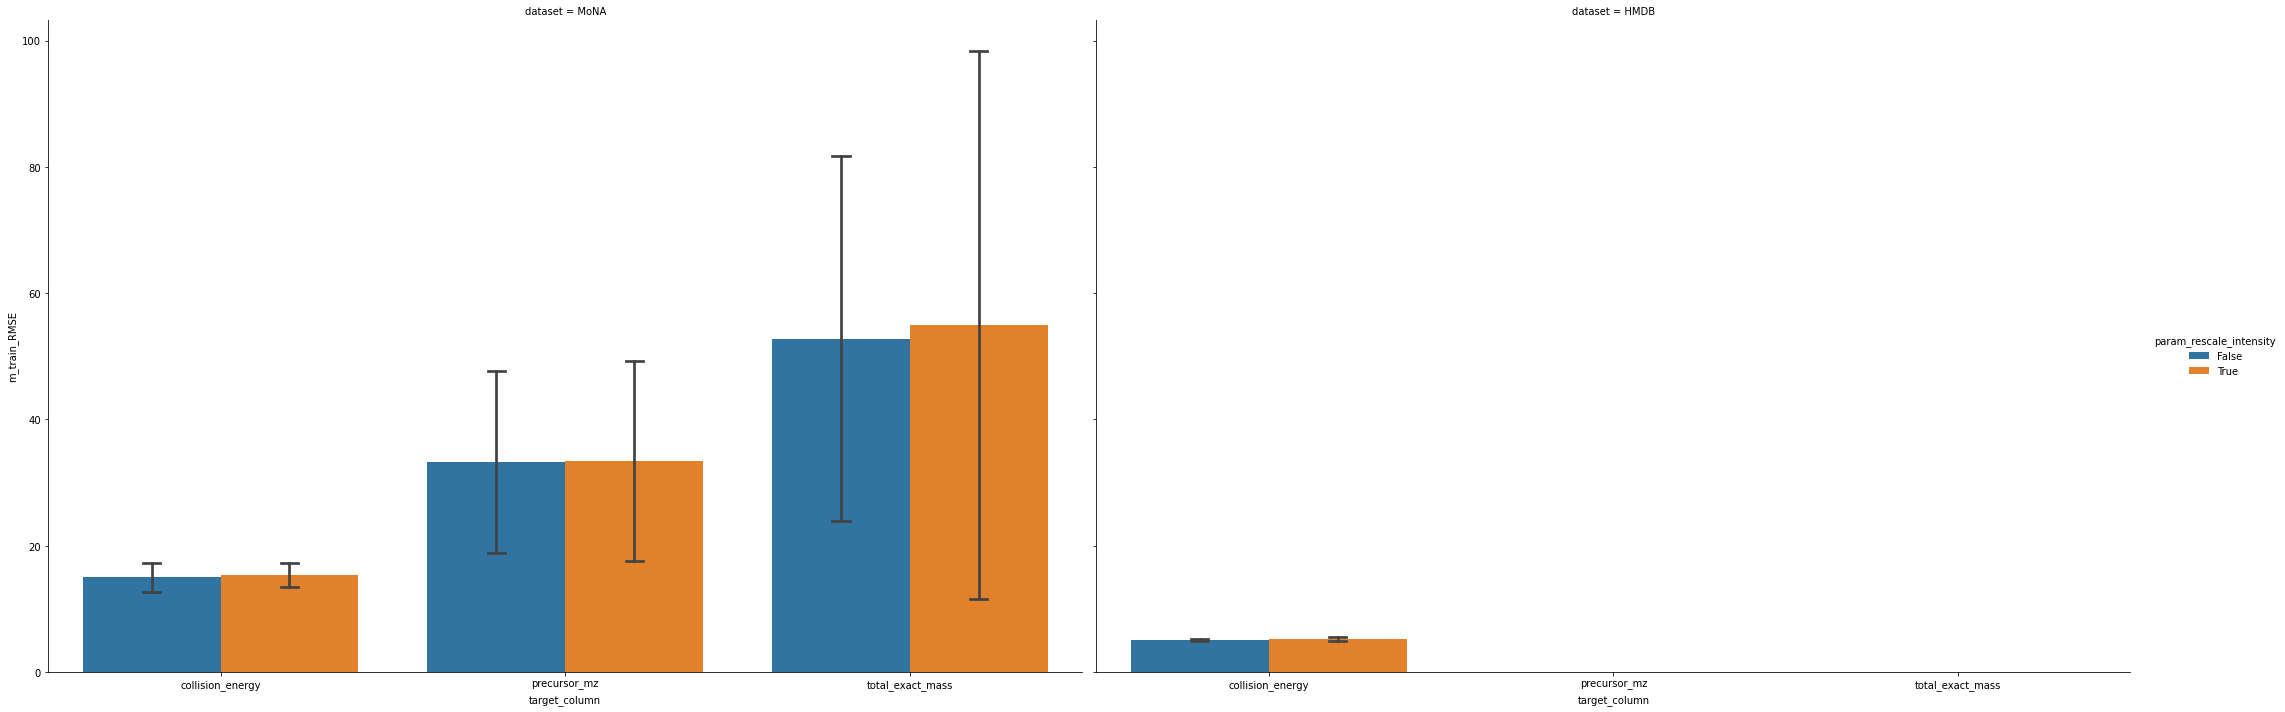

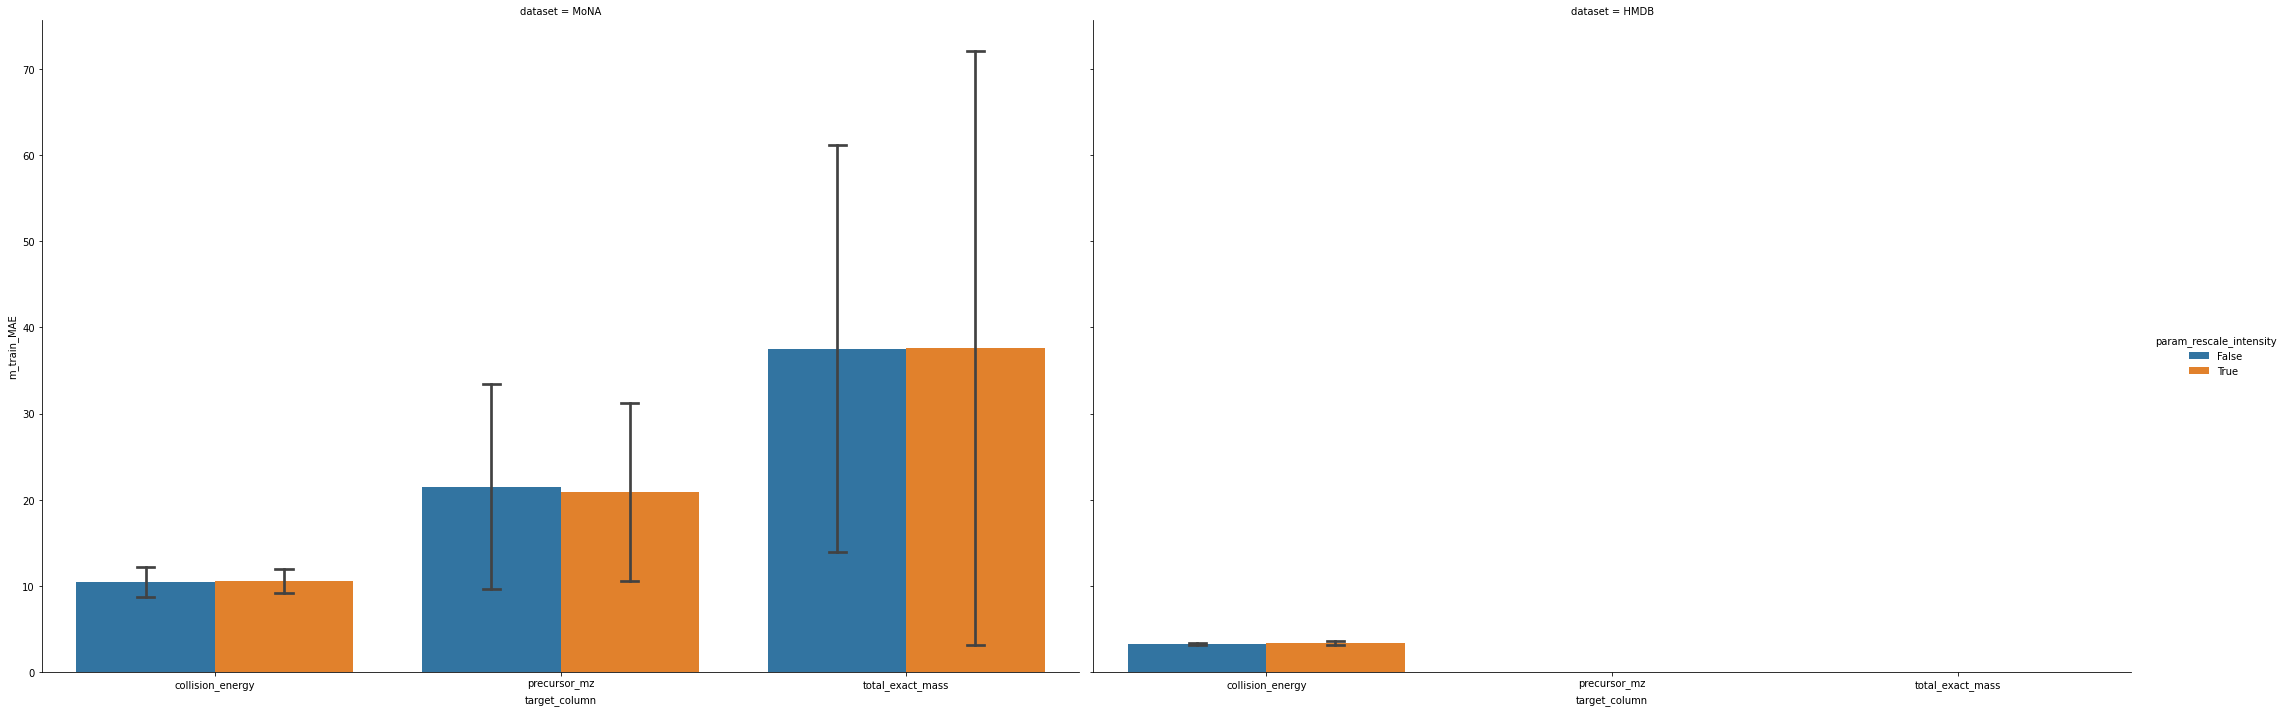

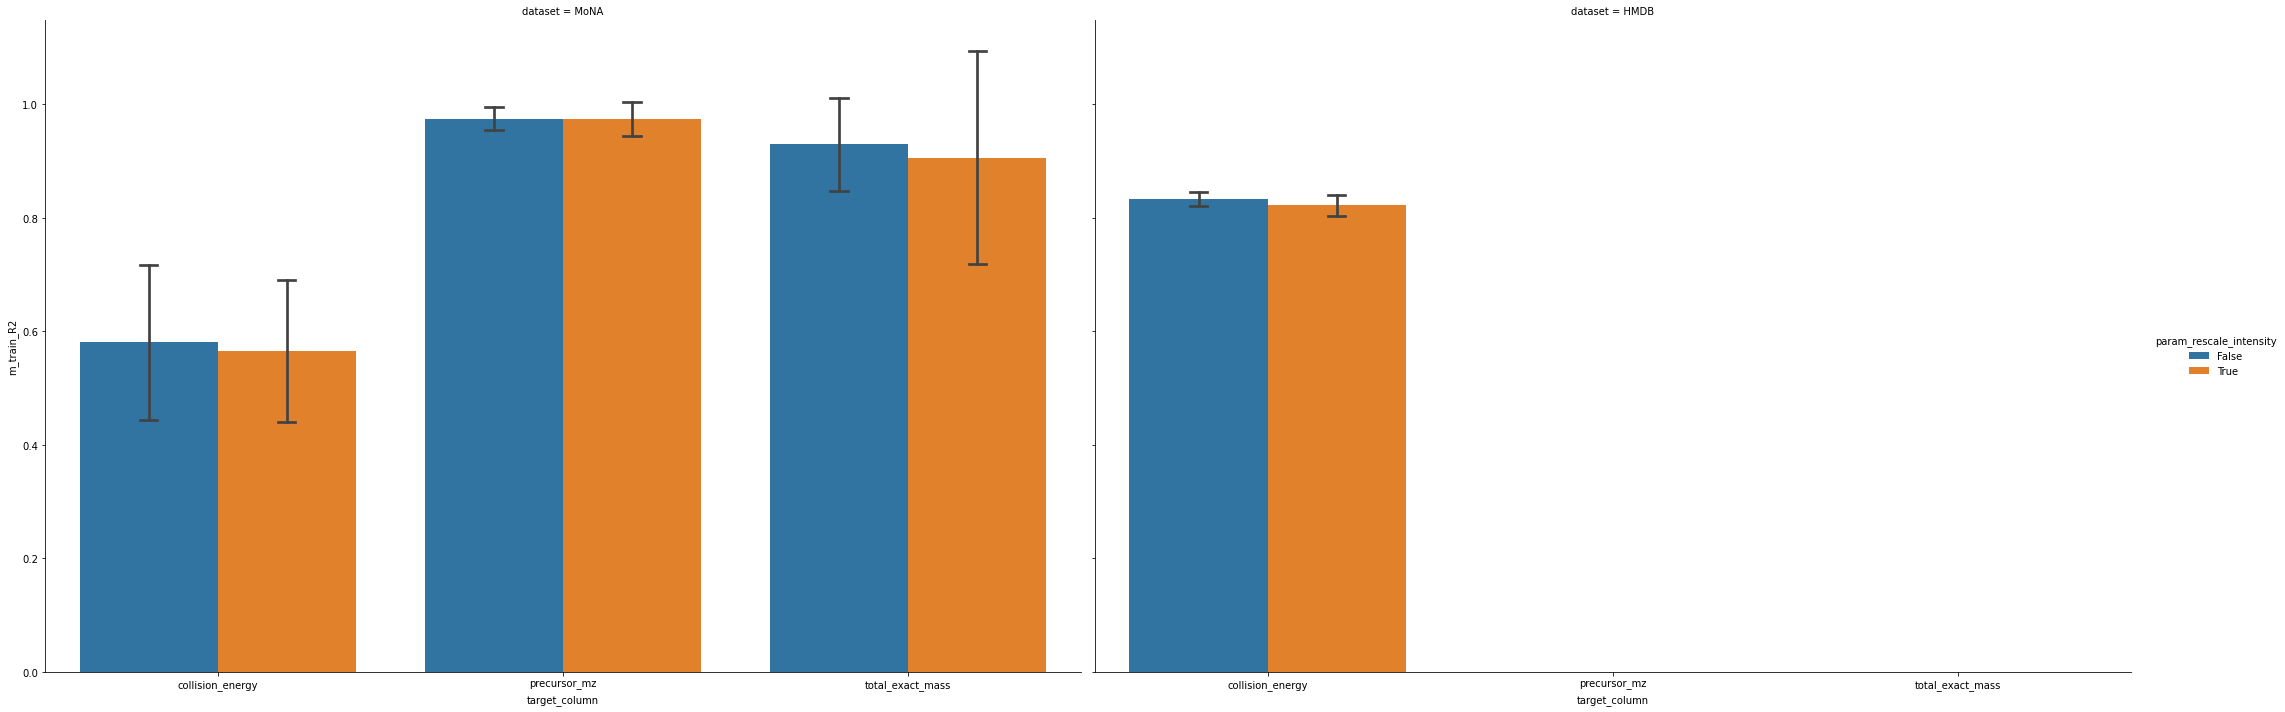

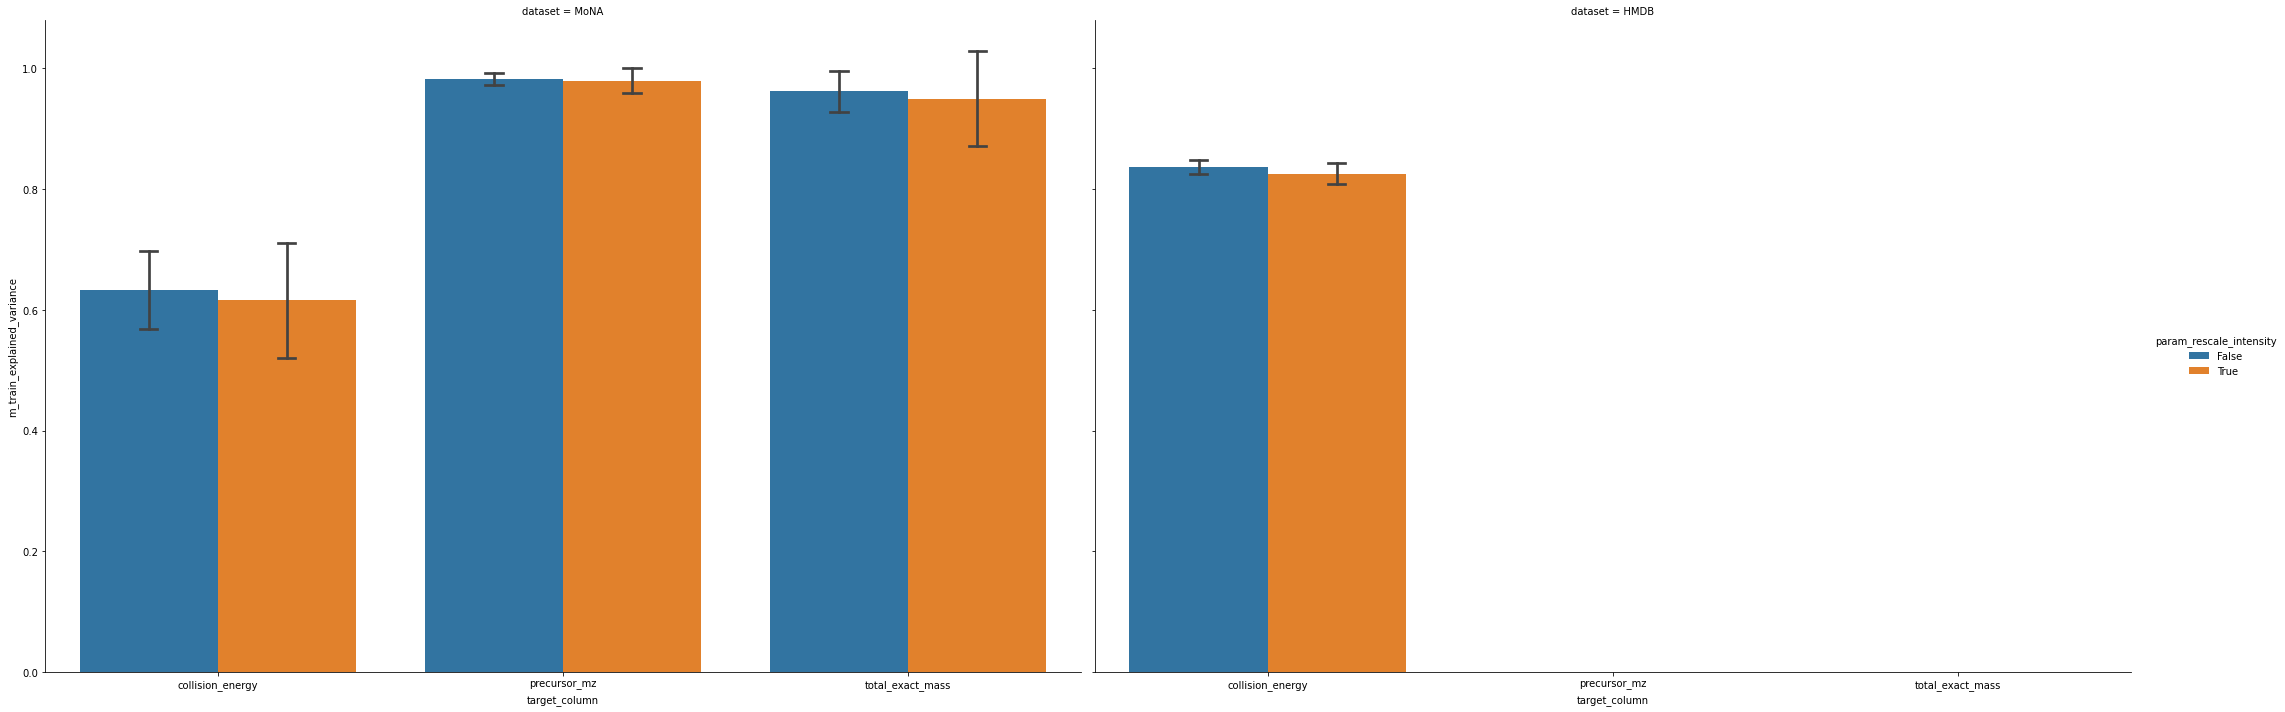

In [8]:
for column in reg_scores:
    ax = sns.catplot(data=df, x="target_column", y=column, col='dataset',
        hue="param_rescale_intensity", kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5)

## Feature importance

Permutation feature importance might vary depending on preprocessing parameters.

### General

In [9]:
target_columns = df['target_column'].unique().tolist()

In [10]:
def extract_pfi(df, target_column):
    import ast
    dfpi = df[df['target_column'].isin([target_column])]
    def extract_pfi_(row):
        fi_dict = ast.literal_eval(row['feature_importance'])
        for k, v in fi_dict.items():
            row['pfi_' + k] = v
        return row
    return dfpi.apply(extract_pfi_, axis=1)

def plot_pfi(df, target_column, hue=None):
    dfpi = extract_pfi(df, target_column)
    pfi_cols = list(filter(lambda x: x.startswith('pfi_'), list(dfpi.columns)))
    oth_cols = list(filter(lambda x: not x.startswith('pfi_'), list(dfpi.columns)))
    dfpi = dfpi.melt(id_vars=oth_cols, value_vars=pfi_cols, var_name='PFI_column', value_name='PFI')
    result = dfpi.groupby(["PFI_column"])['PFI'].aggregate(np.mean).reset_index().sort_values('PFI', ascending=False)
    ax = sns.catplot(data=dfpi, x="PFI", y="PFI_column", hue=hue, kind="bar", col='dataset', ci="sd", capsize=.05, height=10, aspect=1.5, order=result['PFI_column'])
    ax.fig.suptitle("PFI for %s target variable" % target_column)


In [11]:
target_columns

['collision_energy', 'precursor_mz', 'total_exact_mass']

In [12]:
dfs_ = [extract_pfi(df, tc) for tc in target_columns]
dfs = pd.concat(dfs_, ignore_index=True)
cols = columns.copy()
cols.remove('feature_importance')
pfi_cols = list(filter(lambda x: x.startswith('pfi_'), list(dfs.columns)))
dfs = dfs[cols + pfi_cols]
dfs.to_csv(utils.get_project_path() / '.model' / 'regressor_all_features.csv')

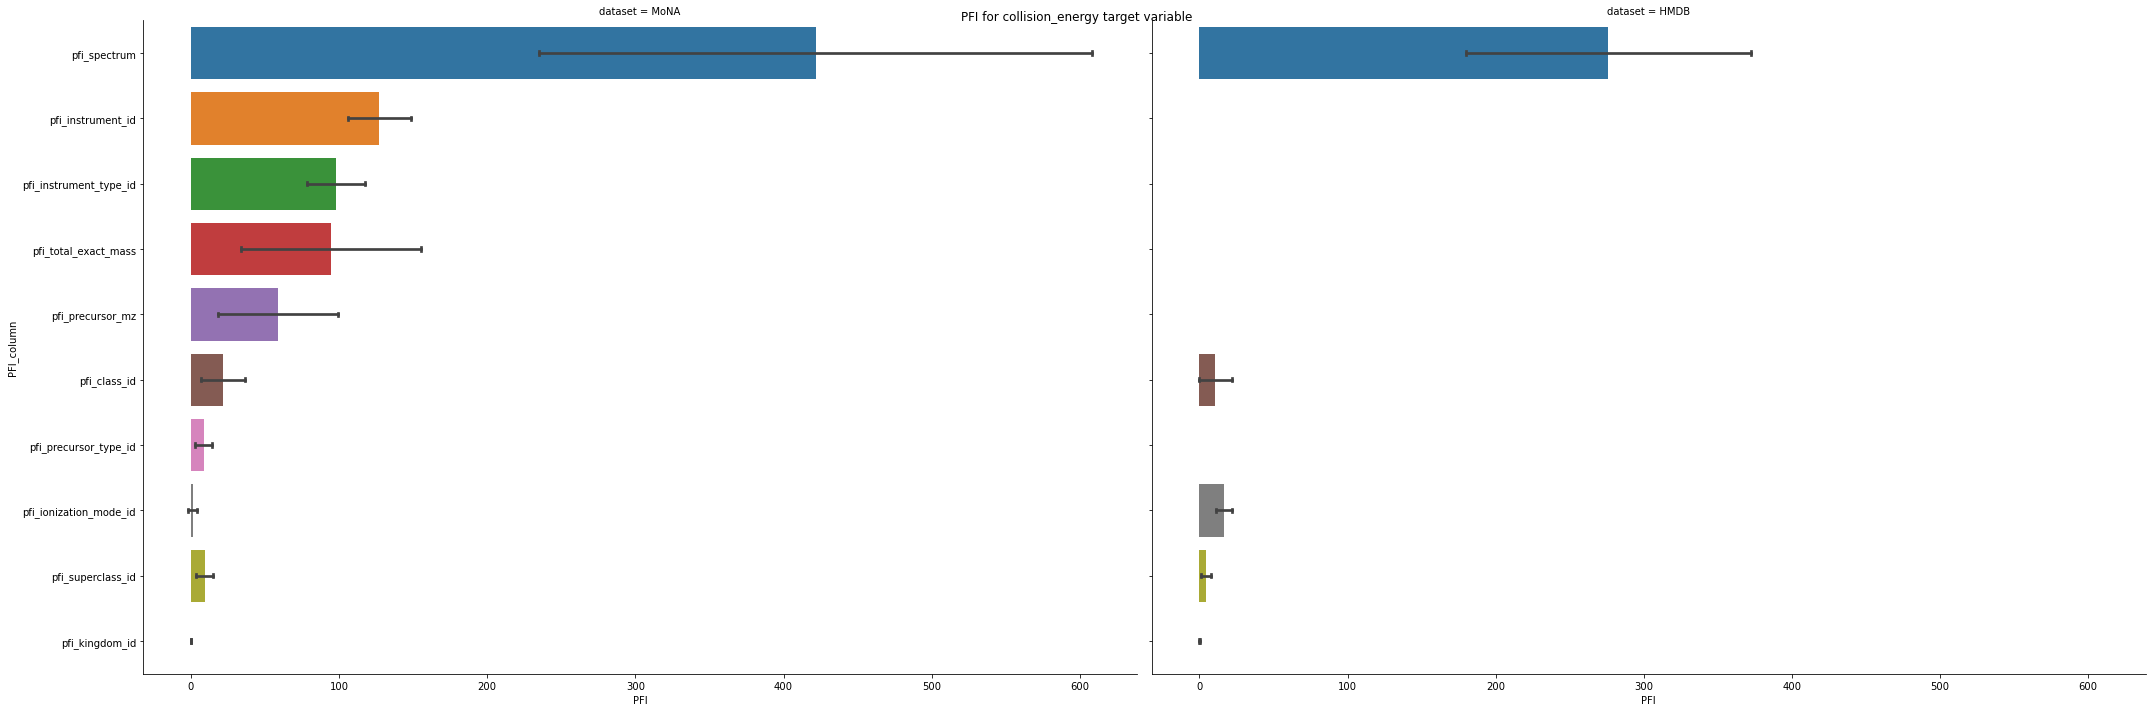

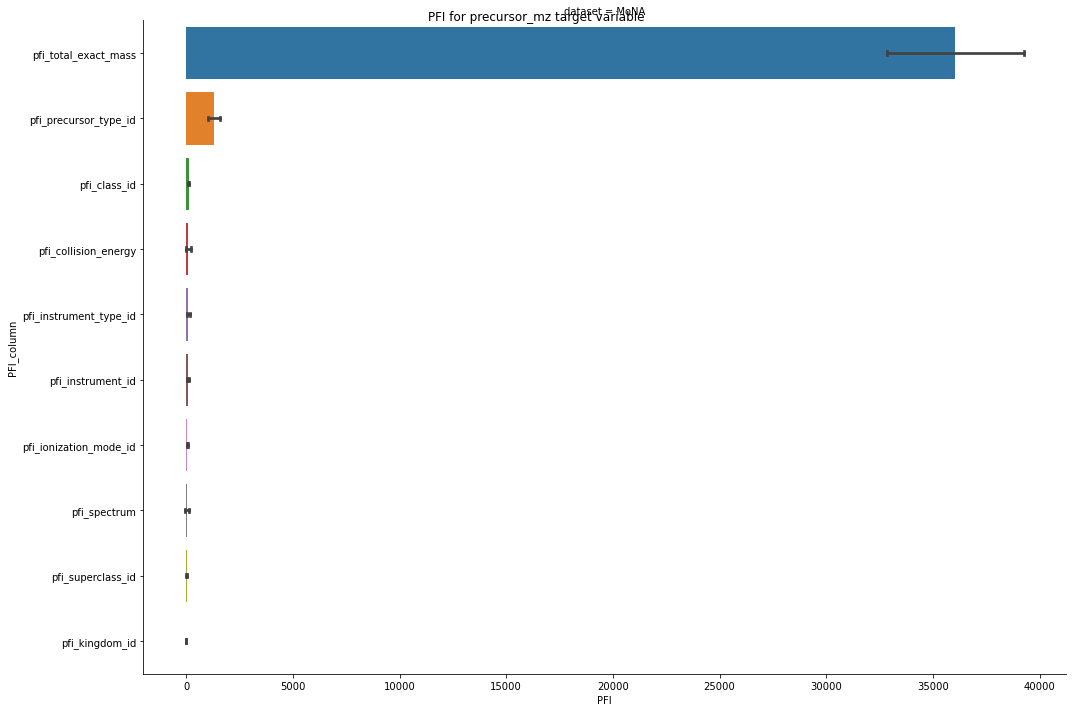

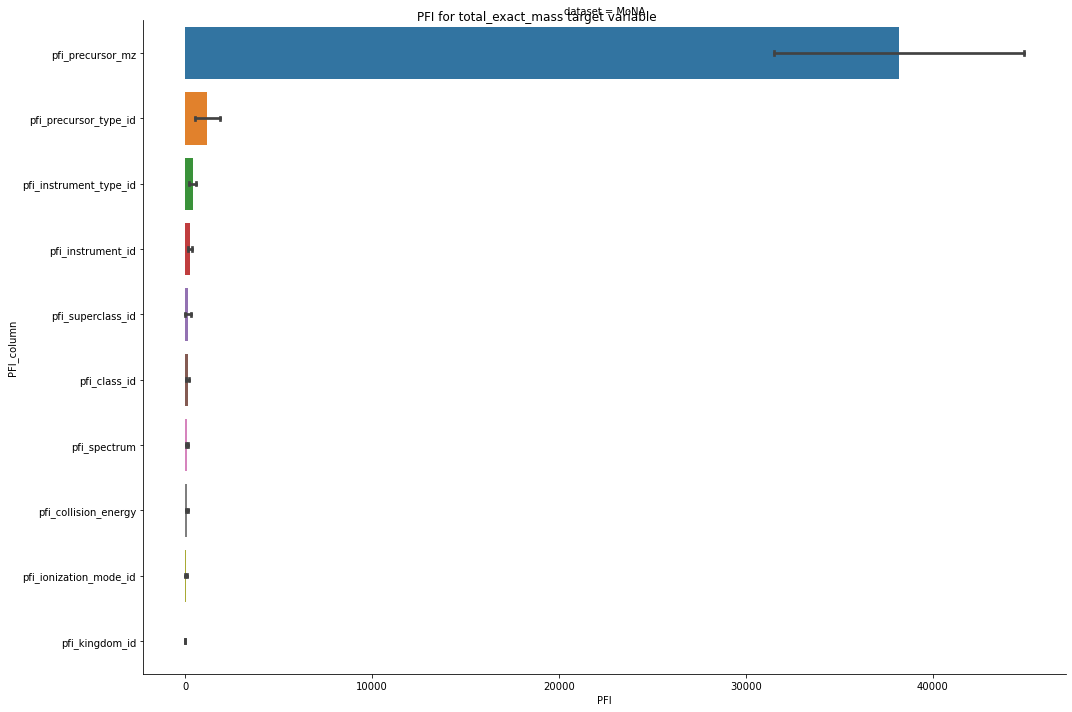

In [26]:
for tc in target_columns:
    plot_pfi(df, tc)

### Number of peaks

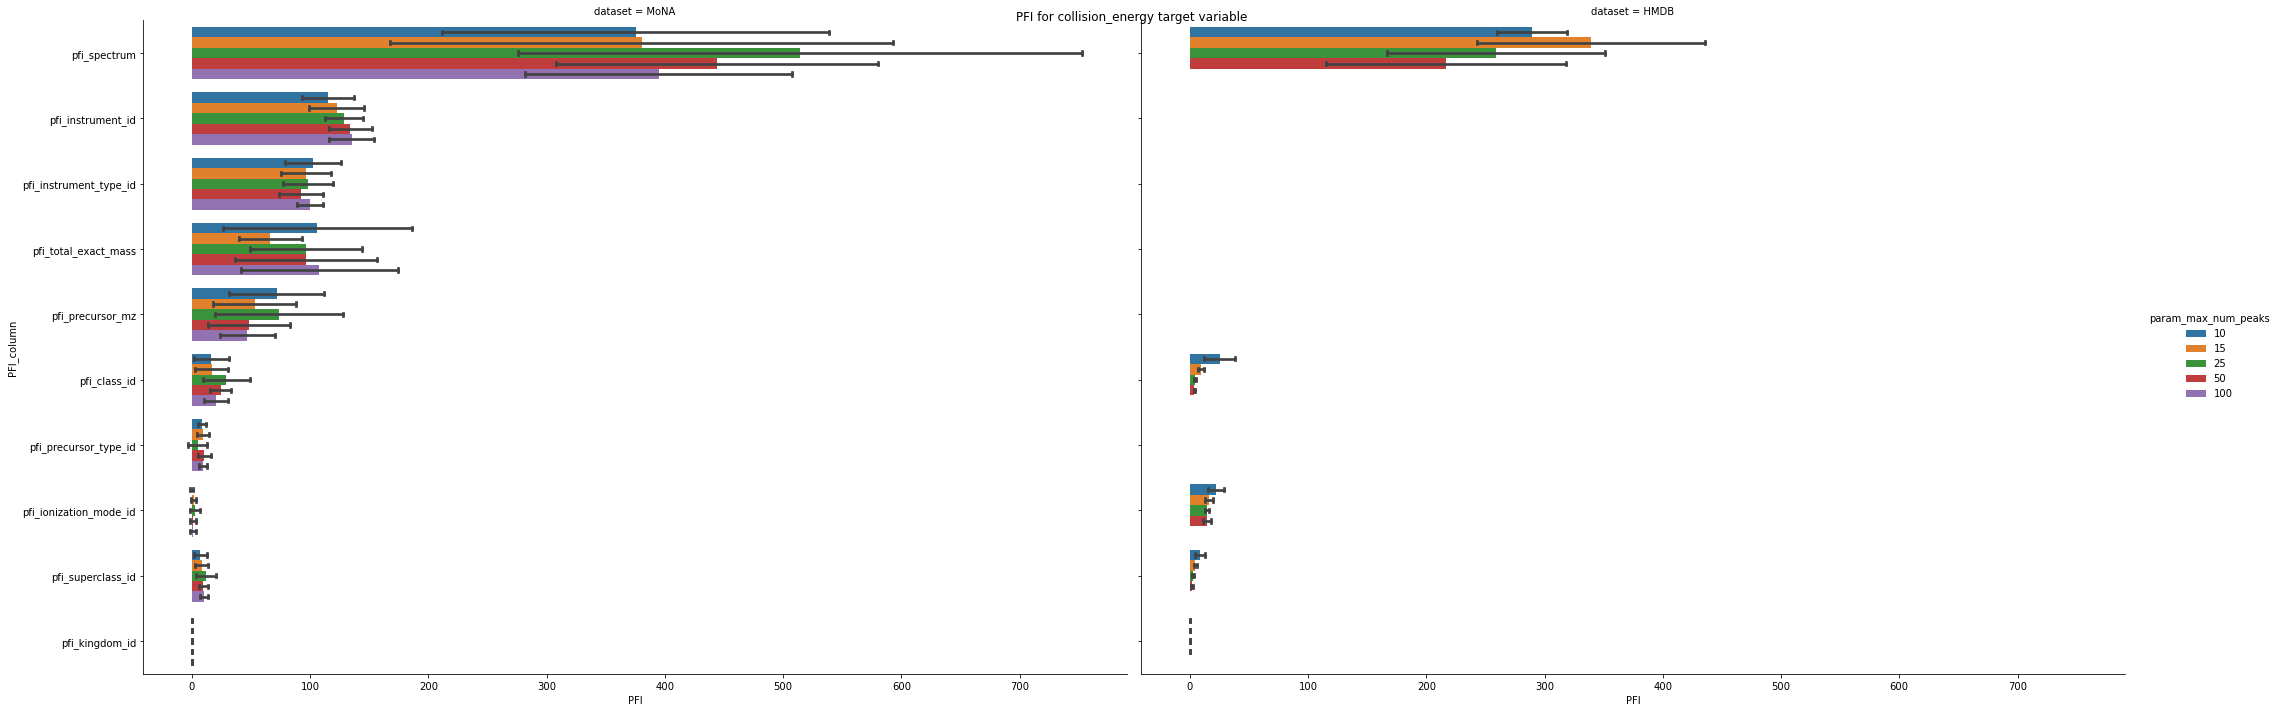

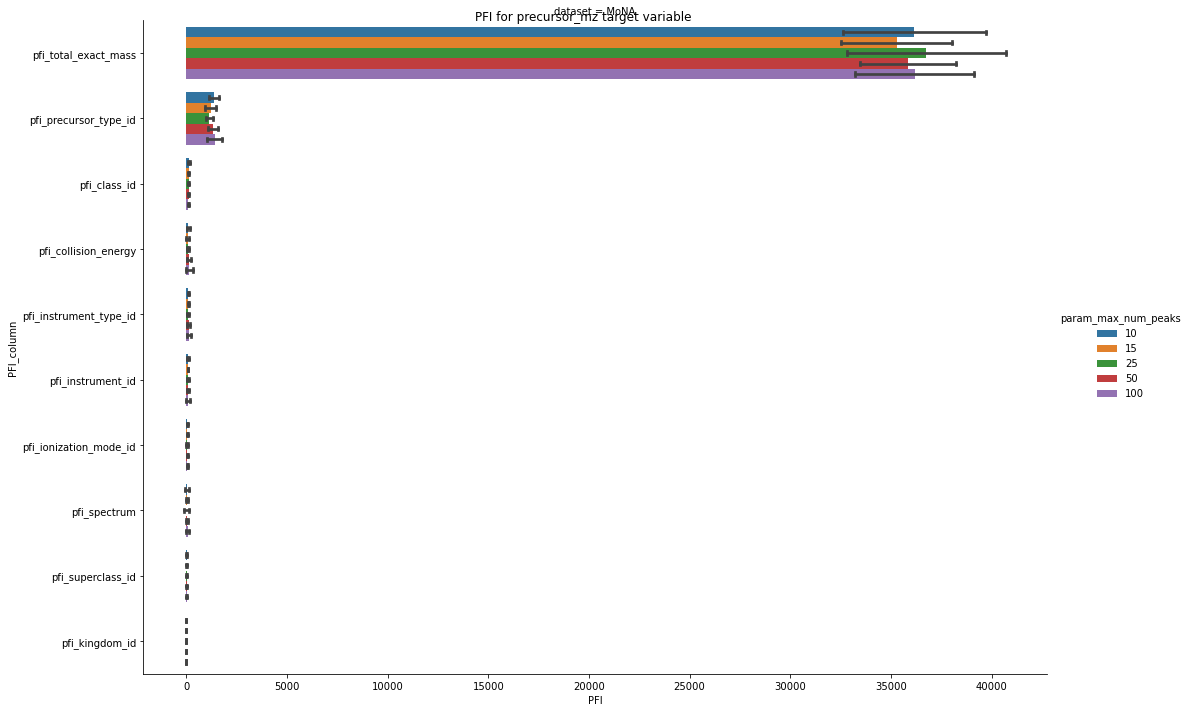

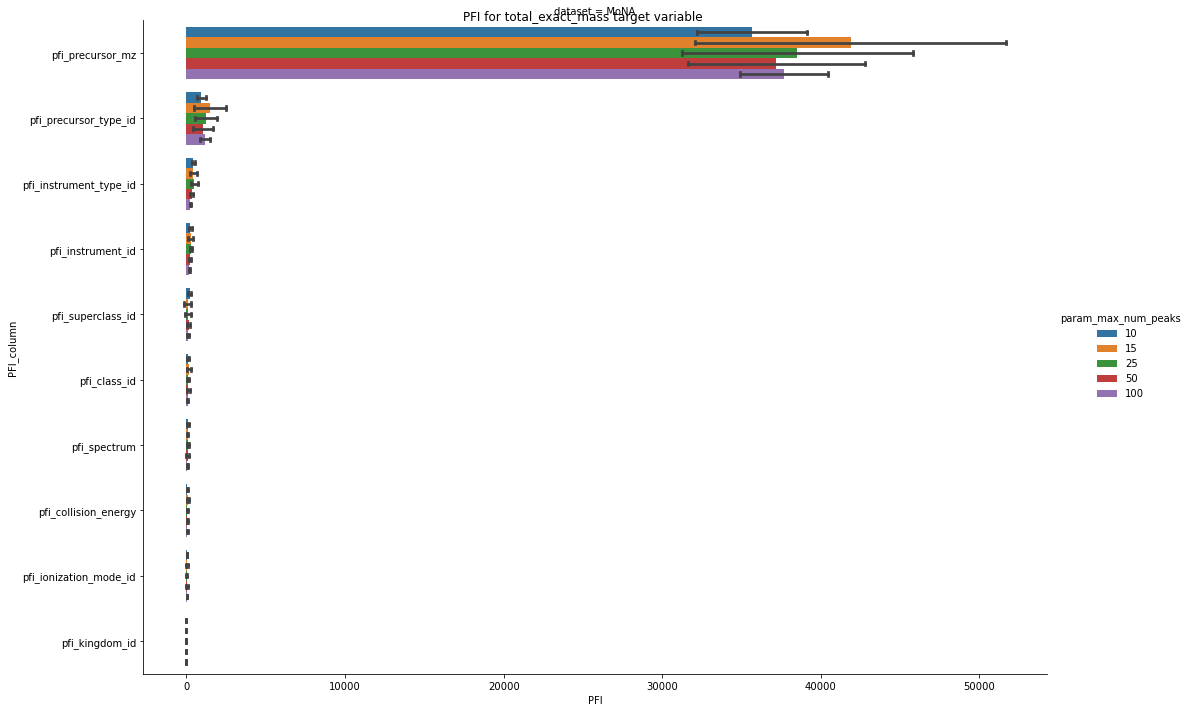

In [27]:
for tc in target_columns:
    plot_pfi(df, tc, hue='param_max_num_peaks')

### Minimum intensity

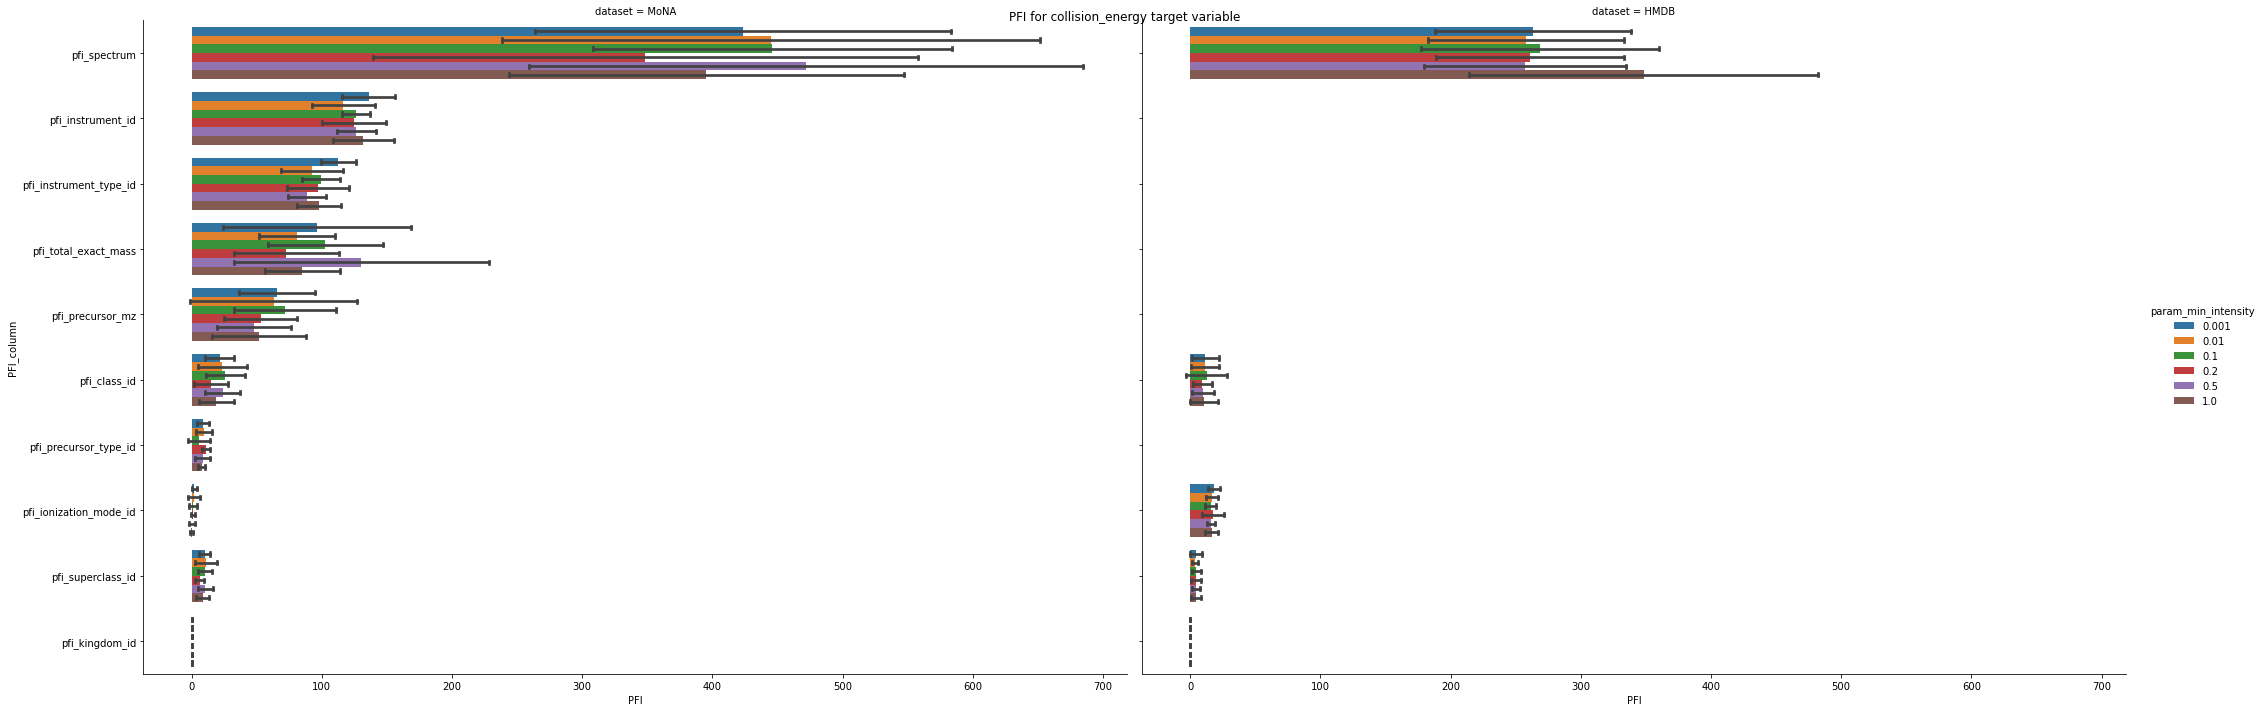

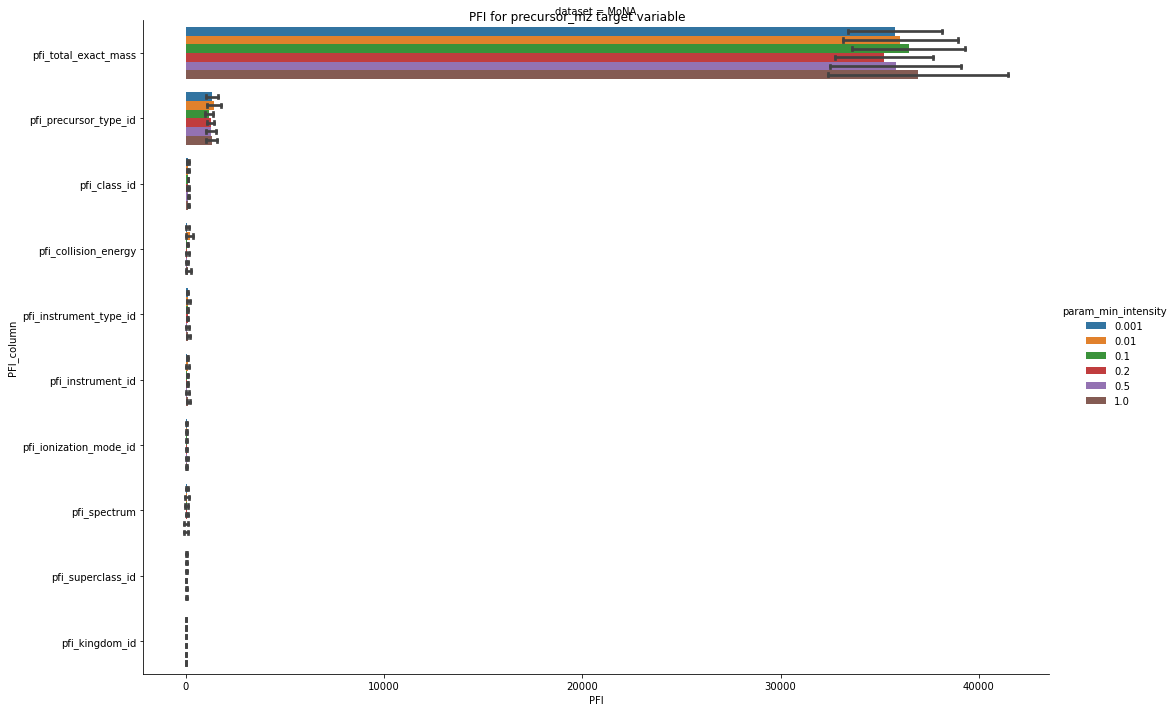

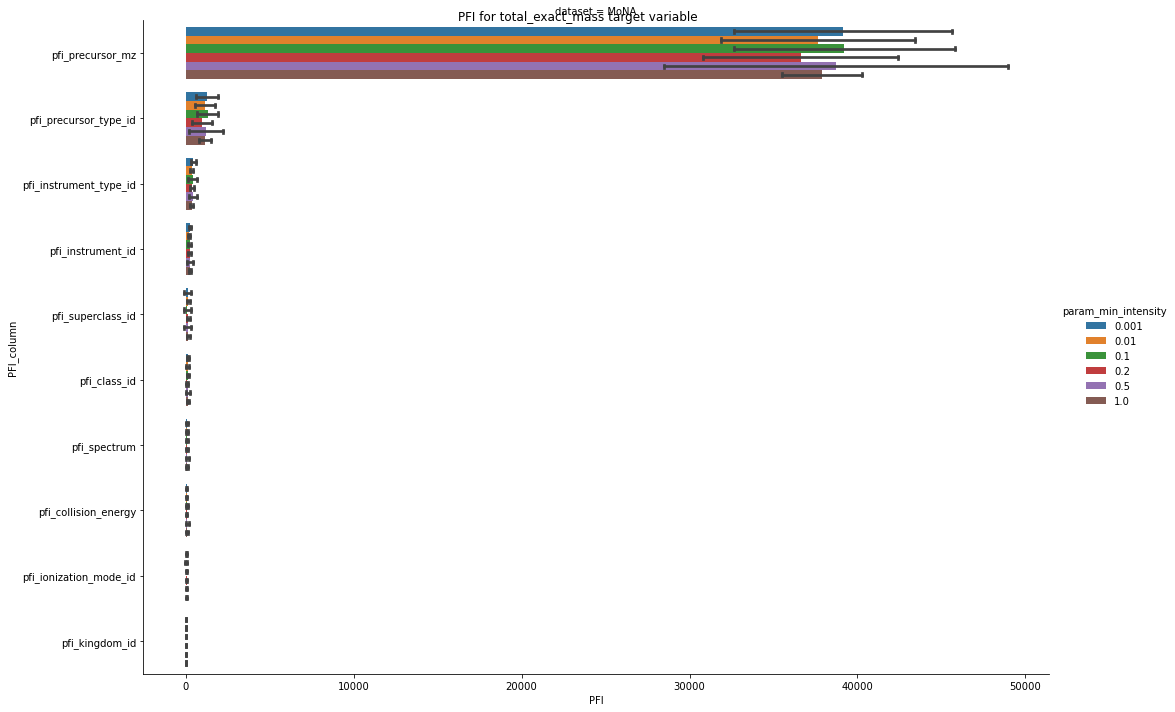

In [28]:
for tc in target_columns:
    plot_pfi(df, tc, hue='param_min_intensity')

### Rescale intensity

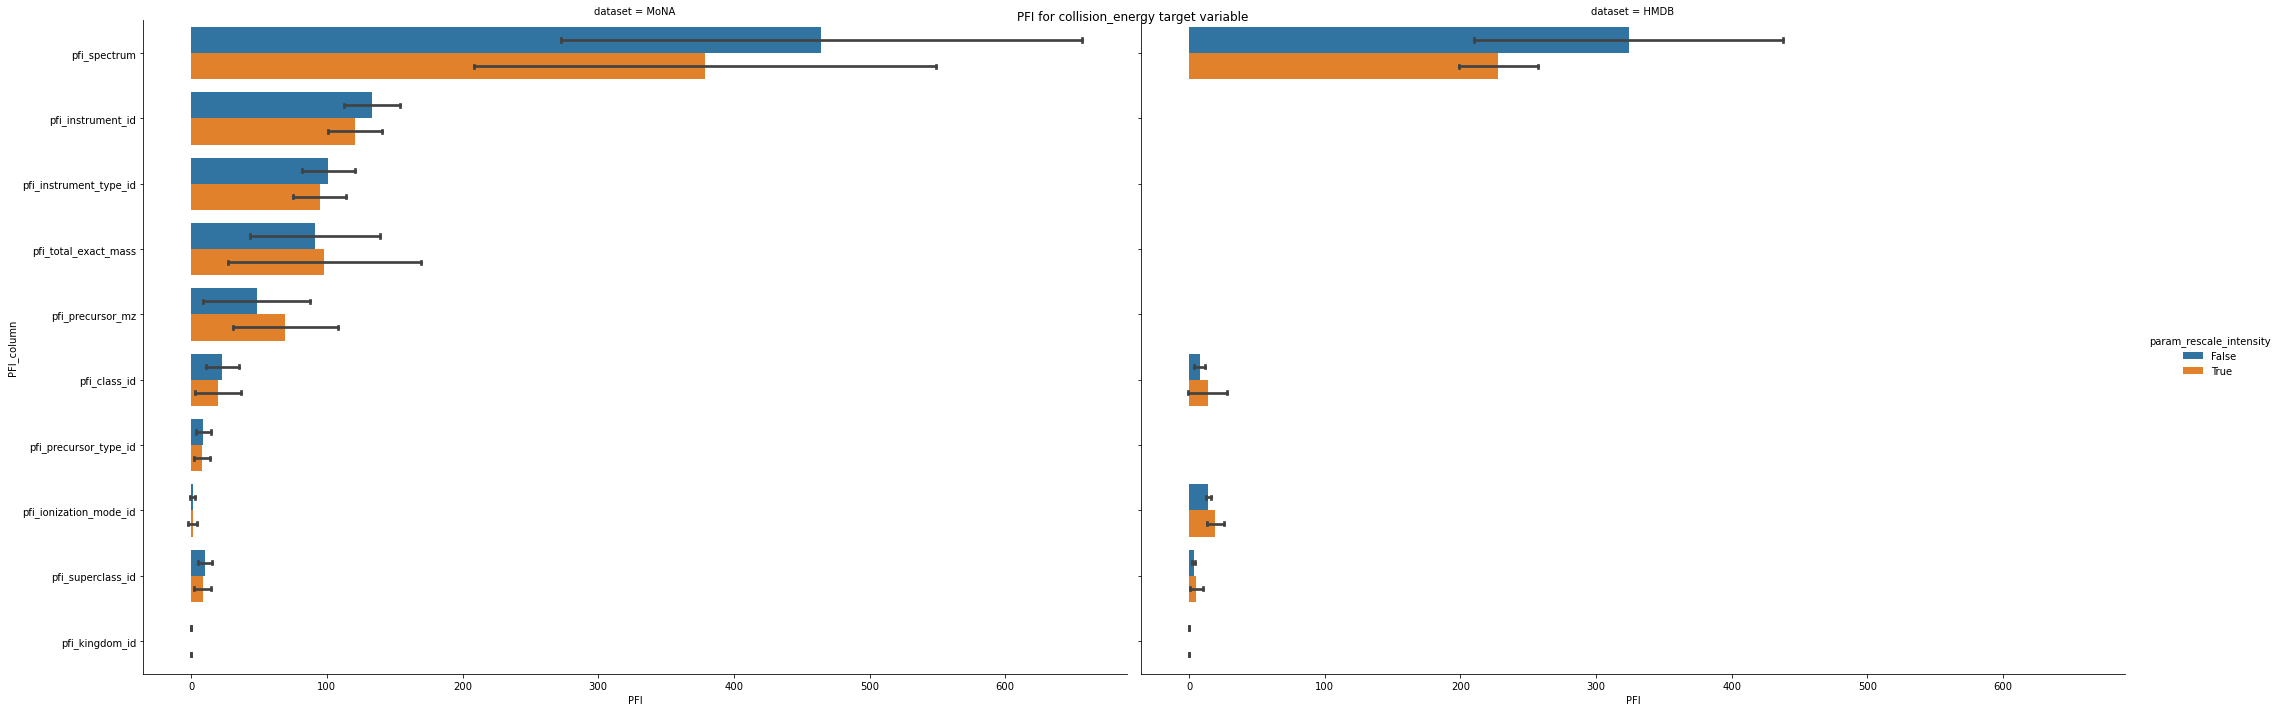

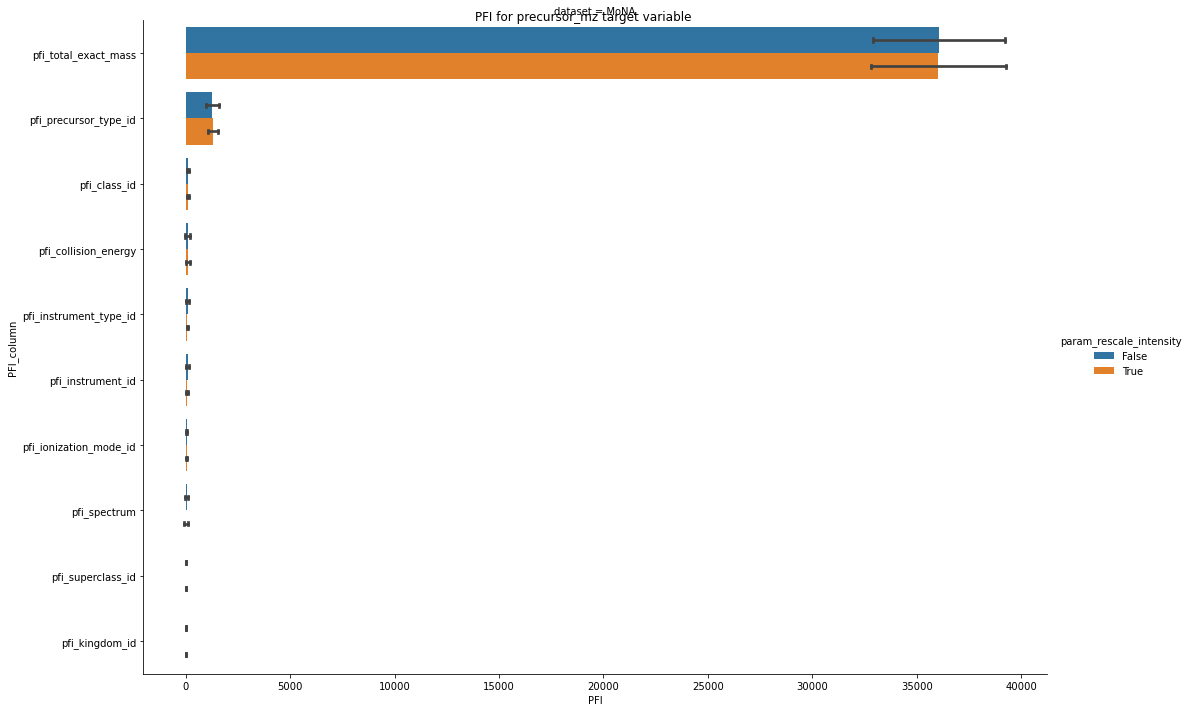

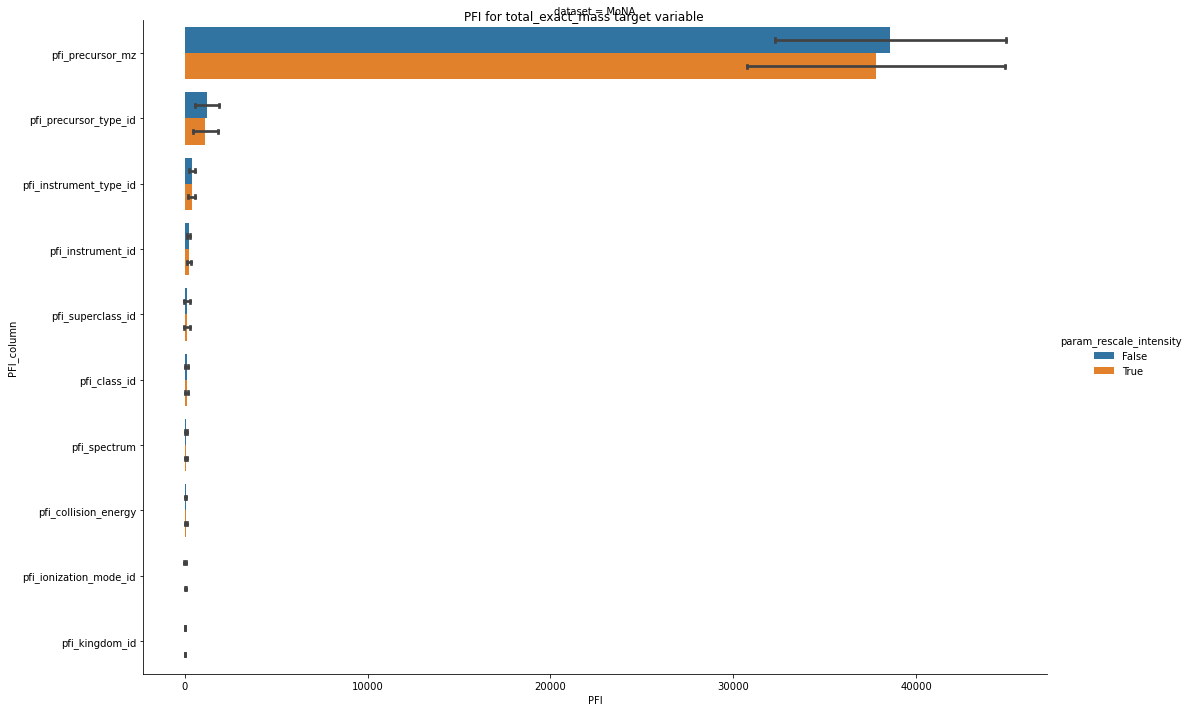

In [29]:
for tc in target_columns:
    plot_pfi(df, tc, hue='param_rescale_intensity')